### 1. Imports

In [2]:
# Data wrangling
import pandas as pd
import numpy as np
from collections import Counter


# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno


# Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier



# Model evaluation
from sklearn.metrics import accuracy_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

### 2. Reading the data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv') 

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:

print(train.shape)
test.shape


(891, 12)


(418, 11)

In [7]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### 3. Data Dictionary:

Survival:	0 = No, 1 = Yes
pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

* sex: Sex	
* Age: Age in years	
* sibsp: # of siblings / spouses aboard the Titanic	
* parch: # of parents / children aboard the Titanic	
* ticket:	Ticket number	
* fare: Passenger fare	
* cabin: Cabin number	
* embarked: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### 4. Exploratory Data Analysis (EDA)

* .info()
* isnull().sum().sort_values()
* missingno.matrix()
* describe()

#### 4.1 Info about the data

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
# Missing data and training set by columns
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [11]:
# Missing data i trest set by columns:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<Axes: >

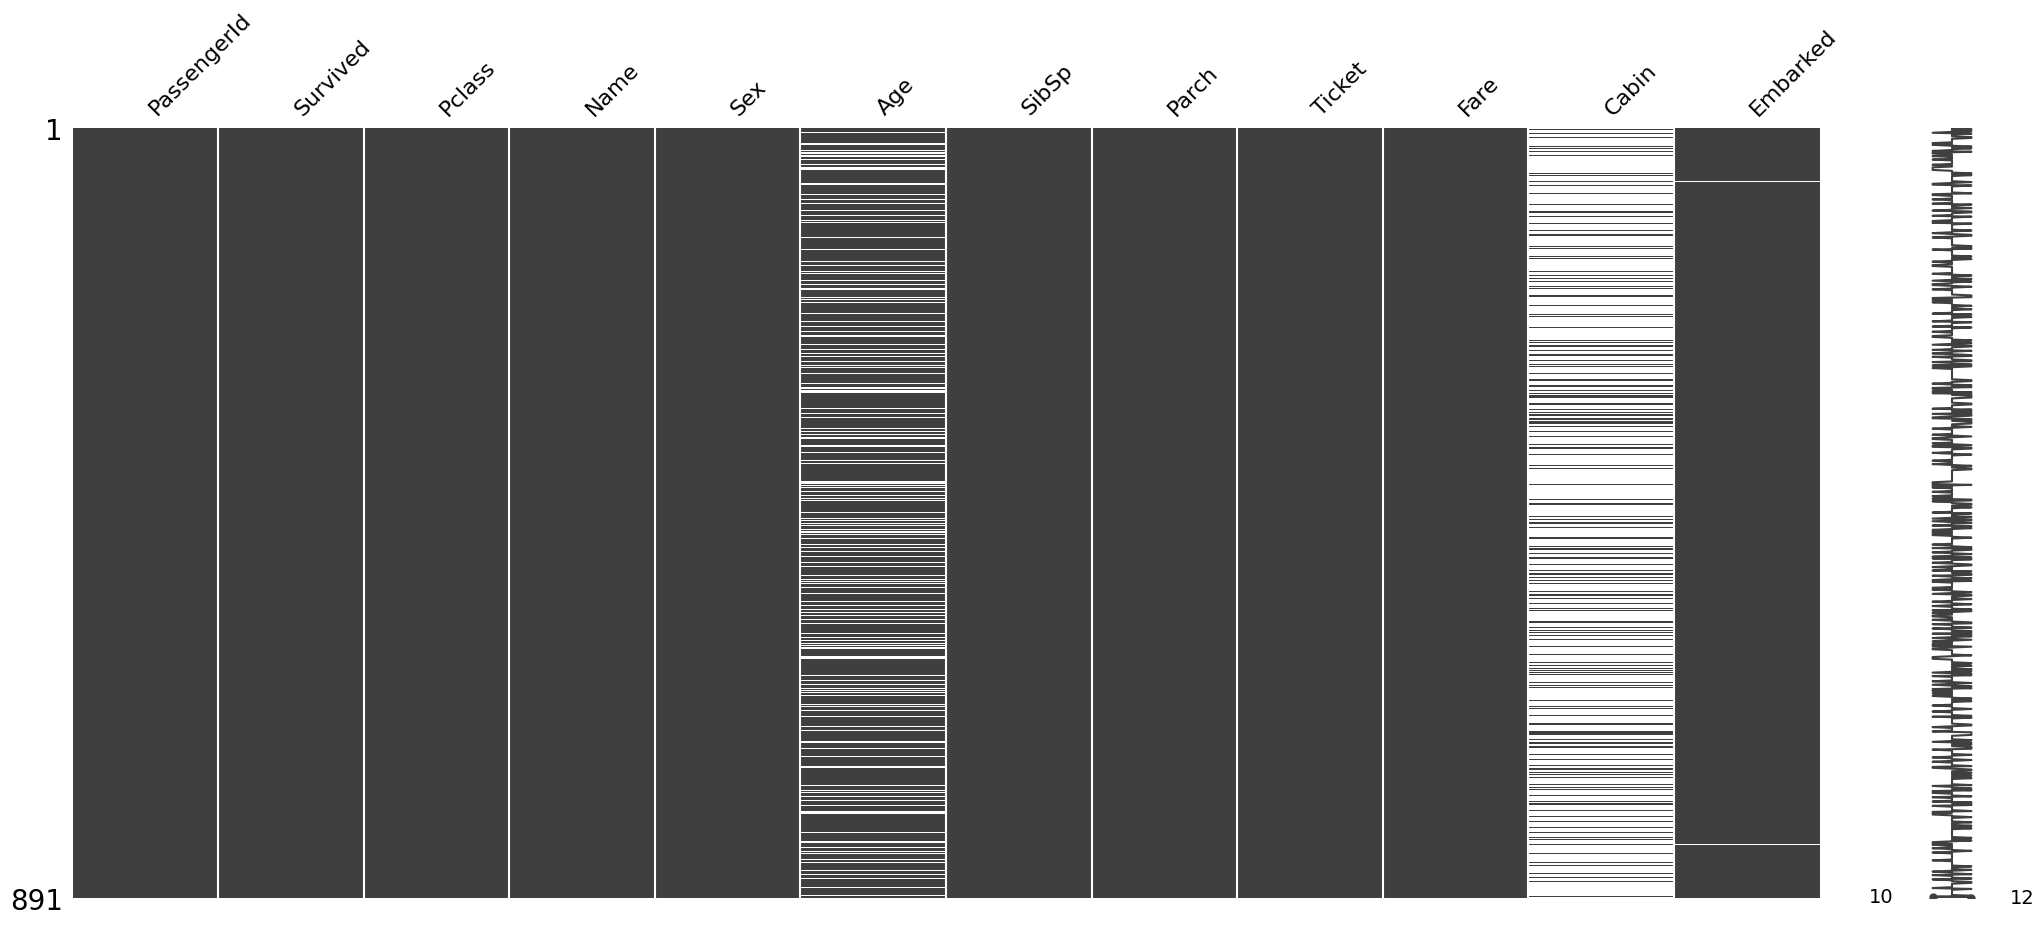

In [12]:
missingno.matrix(train)

<Axes: >

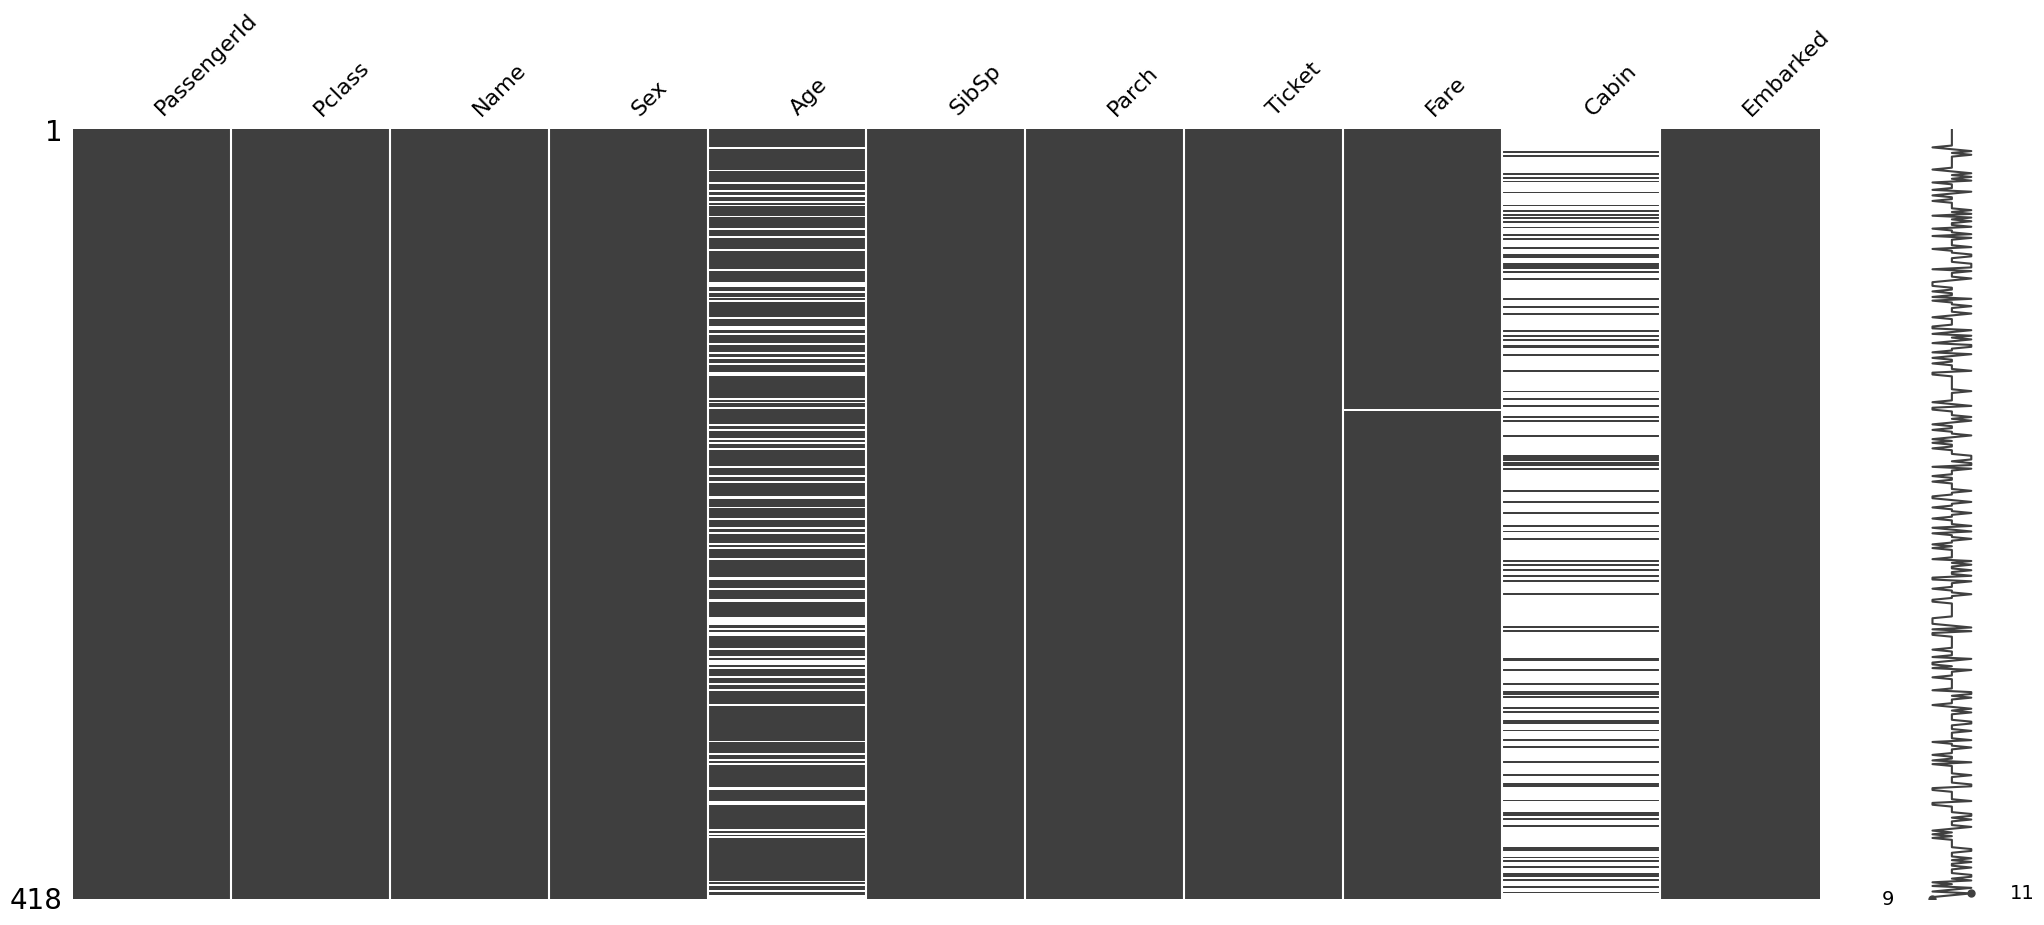

In [13]:
missingno.matrix(test)

In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 4.2 Feature Analysis

categorical(E.g. Sex feature) or numerical(E.g. Age or Fare feature)?
* Sex
* Pclass
* Embarked



### Categorical variables

Categorical values in data set are: 

Categorical variables: Sex
* value_counts()
* groupby()
* sns.barplot

In [16]:
train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [17]:
train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<Axes: xlabel='Sex', ylabel='Survived'>

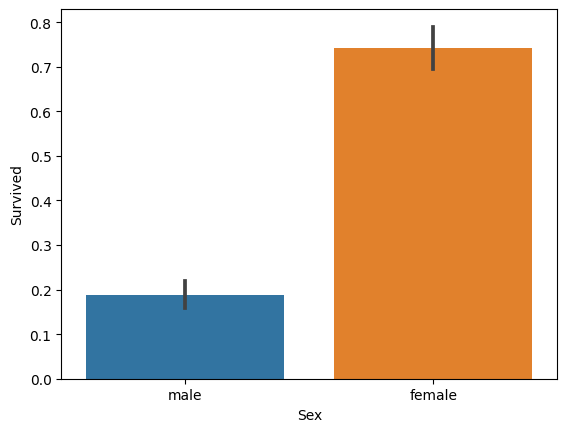

In [18]:
sns.barplot(data=train, x='Sex', y='Survived')

Categorical Variable: Pclass
* value_counts

In [19]:
train[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


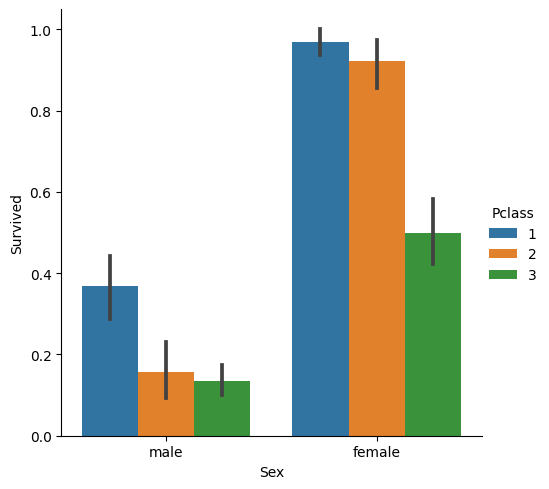

In [20]:
sns.catplot(data=train, x='Sex', y='Survived', hue='Pclass', kind='bar')

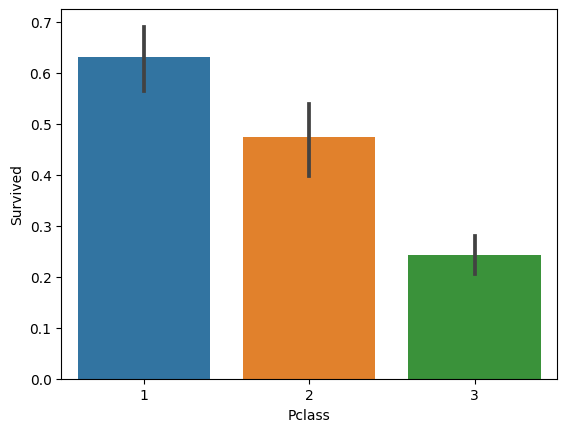

In [21]:
sns.barplot(data=train, x='Pclass', y='Survived')
plt.show()

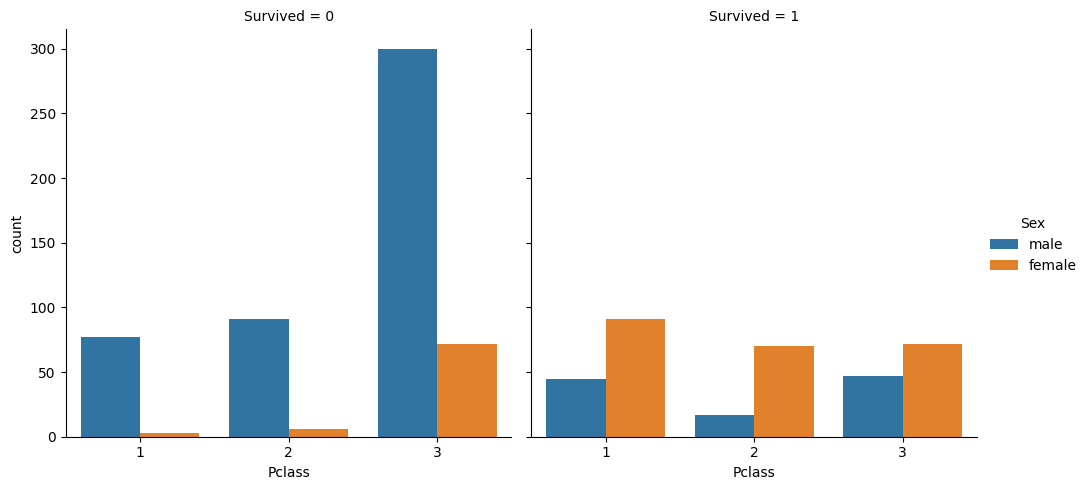

In [22]:
sns.catplot(data=train, x='Pclass', col='Survived', hue='Sex', kind='count')

Categorical variable: Embarked


In [23]:
train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [24]:
train[['Embarked','Survived']].groupby('Embarked', as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<Axes: xlabel='Embarked', ylabel='Survived'>

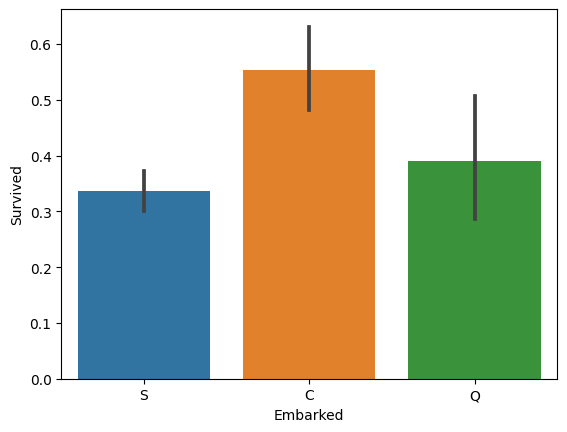

In [25]:
sns.barplot(data=train, x='Embarked', y='Survived')

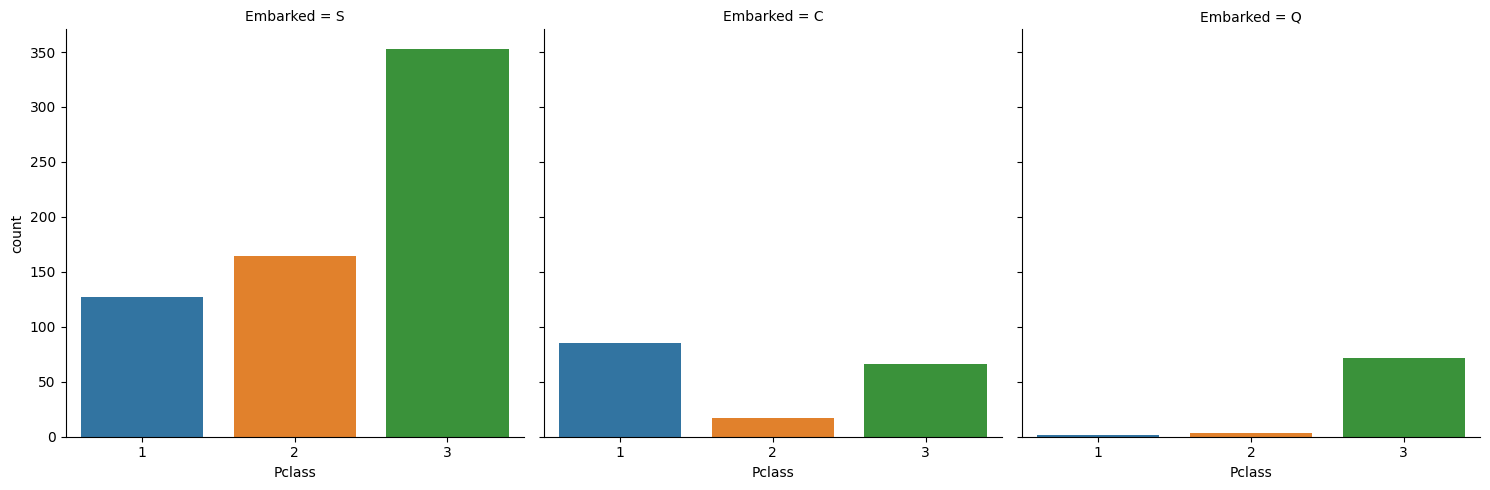

In [26]:
sns.catplot(data=train, x='Pclass', col='Embarked', kind='count')

In [27]:
def detect_outliers(df, n, features):
    outliers_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        multiple_outliers = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outliers_indices.extend(multiple_outliers)
    outliers_indices = Counter(outliers_indices)
    m_outliers = list(key for key, value in outliers_indices.items() if value > 2)
    return(m_outliers)

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch','Fare'])
print('We will drop these {} outliers:'.format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 outliers: [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [28]:
train.loc[outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [29]:
print('Before droping training set has {} rows'.format(len(train)))
train = train.drop(outliers_to_drop, axis=0).reset_index(drop=True)
print('After droping training set has {} rows'.format(len(train)))

Before droping training set has 891 rows
After droping training set has 881 rows


### Numerical variables correlation with target
* SibSp
* Parch
* Age
* Fare

<Axes: >

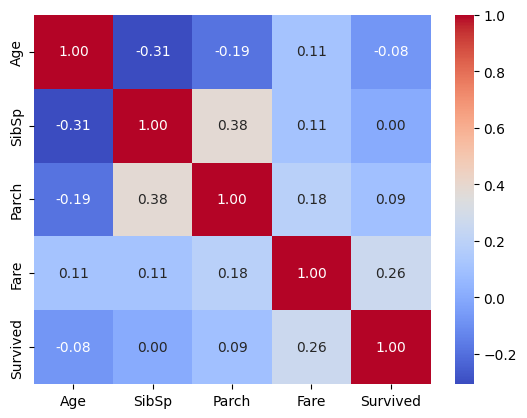

In [30]:
sns.heatmap(train[['Age', 'SibSp', 'Parch','Fare', 'Survived']].corr(), annot=True, fmt='.2f', cmap='coolwarm')

Numerical Variable: SibSp

In [31]:
train.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     13
5      5
Name: count, dtype: int64

In [32]:
train[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values('Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


<Axes: xlabel='SibSp', ylabel='Survived'>

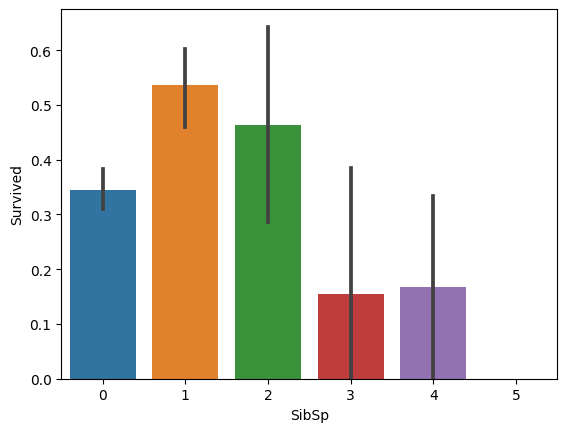

In [33]:
sns.barplot(data=train, x='SibSp', y='Survived')

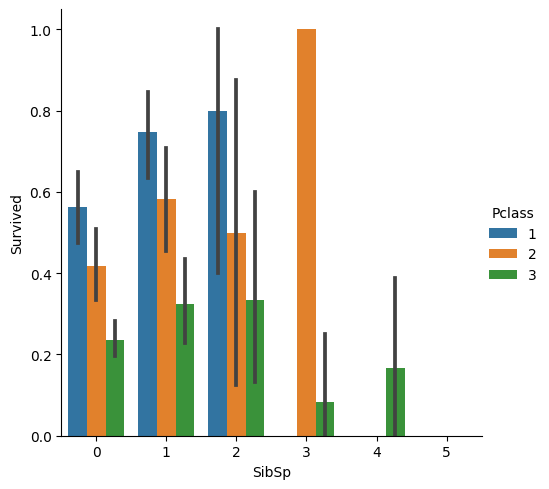

In [34]:
sns.catplot(data=train, x='SibSp', y='Survived', hue='Pclass', kind='bar')

In [35]:
train.Parch.value_counts()

Parch
0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [36]:
train[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values('Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


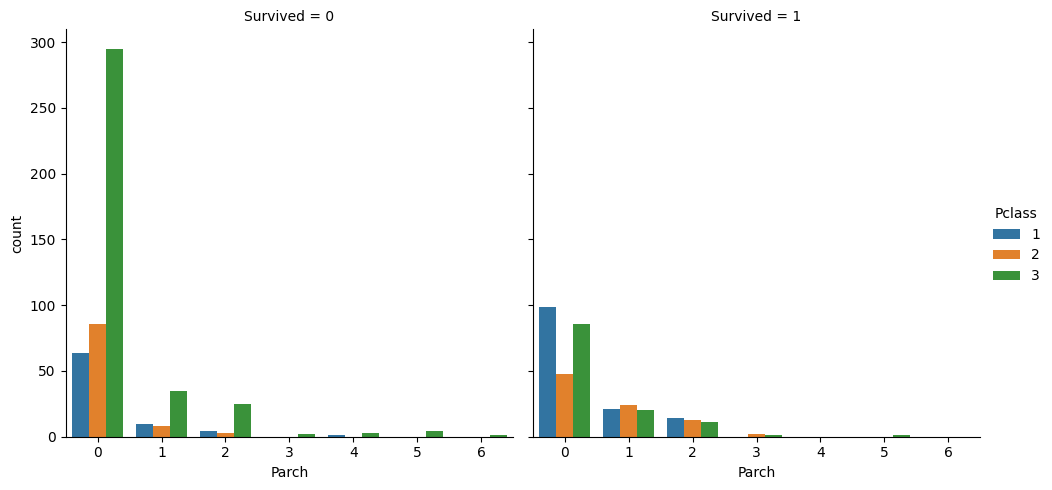

In [37]:
sns.catplot(data=train, x='Parch', col='Survived', hue='Pclass', kind='count')

<Axes: xlabel='Parch', ylabel='Survived'>

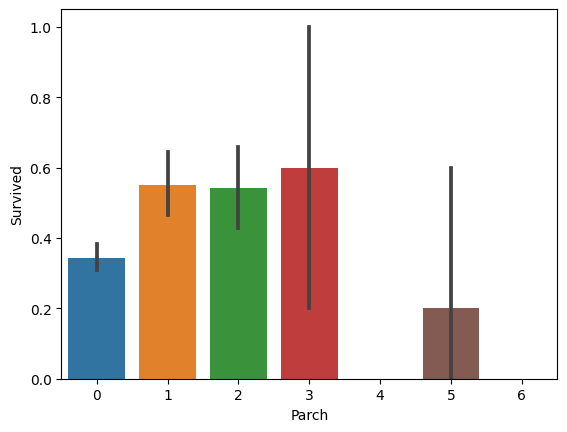

In [38]:
sns.barplot(data=train, x='Parch', y='Survived')

Numerical value: Age

In [39]:
train.Age.isnull().sum()

170

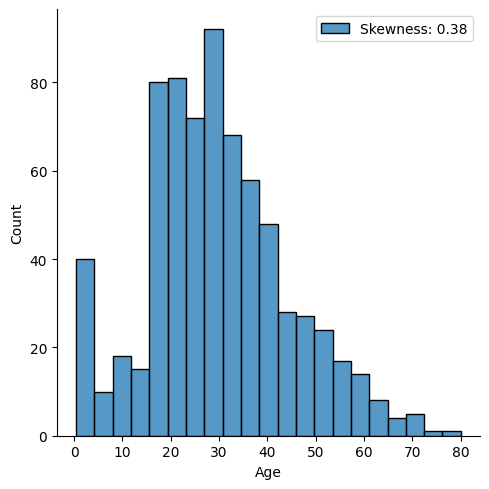

In [40]:
sns.displot(train['Age'], label='Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc='best')

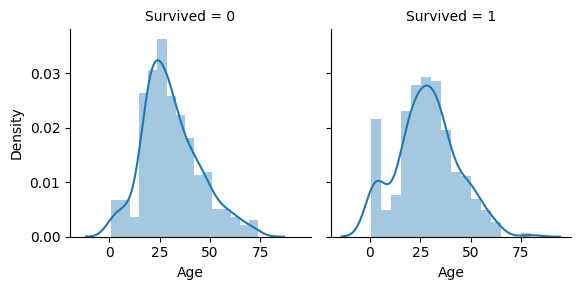

In [41]:
g = sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'Age')


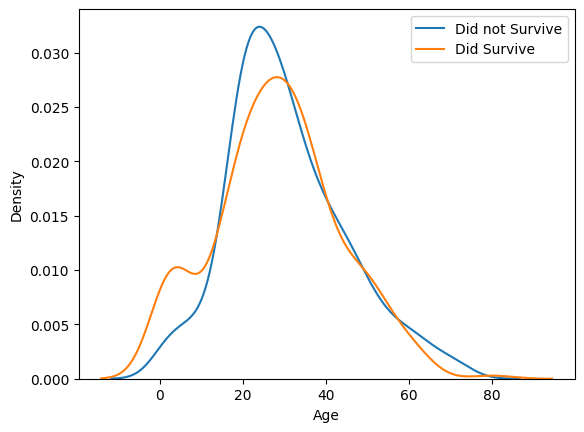

In [42]:
sns.kdeplot(train['Age'][train.Survived == 0], label = 'Did not Survive')
sns.kdeplot(train['Age'][train.Survived == 1], label = 'Did Survive')
plt.legend(loc='best')


Numerical variable: Fare


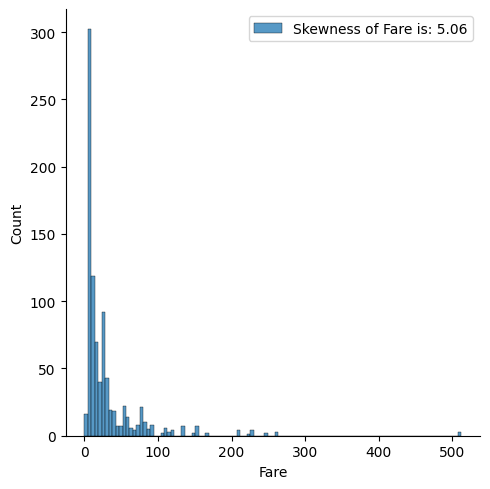

In [43]:
sns.displot(train.Fare, label='Skewness of Fare is: %.2f'%(train.Fare.skew()))
plt.legend(loc='best')

### PART 2


### 5. Data preprocesing
Data preprocesing is the process of getting our dataset ready for model training.
In this section we will perform the following preprocessing steps:

* Drop and fill missing values
* Data transformation
* Feature engineering
* Feature encoding

##### 5.1 Drop and fill NaN

In [44]:
train.isnull().sum().sort_values(ascending=False)

Cabin          680
Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [45]:
train = train.drop(['Cabin','Ticket'], axis=1)
test = test.drop(['Cabin','Ticket'], axis=1)

In [46]:
#Computing the mos frequest value of Embarked column:
mode = train.Embarked.dropna().mode()[0]

In [47]:
#Fill na Values with the mode
train.Embarked.fillna(mode, inplace=True)

In [48]:
#Missing values in test set
test.isnull().sum().sort_values(ascending=False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [49]:
median = test.Fare.dropna().median()
median

14.4542

In [50]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [51]:
test.Fare.fillna(median, inplace=True)

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [53]:
# Combine training and test set
combine = pd.concat([train, test], axis=0).reset_index(drop=True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [54]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1299 non-null   int64  
 1   Survived     881 non-null    float64
 2   Pclass       1299 non-null   int64  
 3   Name         1299 non-null   object 
 4   Sex          1299 non-null   object 
 5   Age          1043 non-null   float64
 6   SibSp        1299 non-null   int64  
 7   Parch        1299 non-null   int64  
 8   Fare         1299 non-null   float64
 9   Embarked     1299 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 101.6+ KB


In [55]:
combine.isnull().sum().sort_values(ascending=False)

Survived       418
Age            256
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [56]:
# Convert Sex- categorical value into numerical values where 0 is male and 1 is female
combine.Sex = combine.Sex.map({'female': 1, 'male': 0})
combine.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S
5,6,0.0,3,"Moran, Mr. James",0,NaN,0,0,8.4583,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,51.8625,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,21.0750,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,11.1333,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,30.0708,C


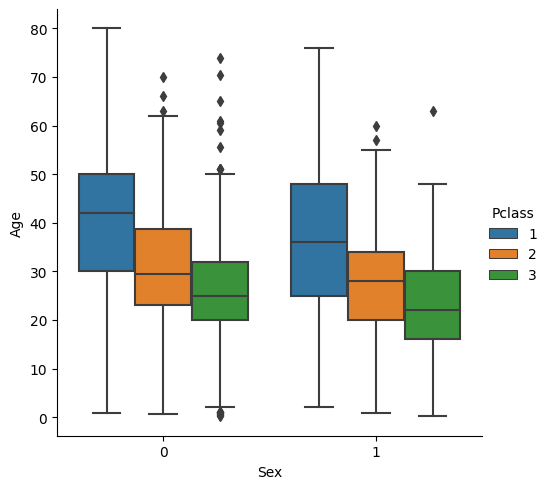

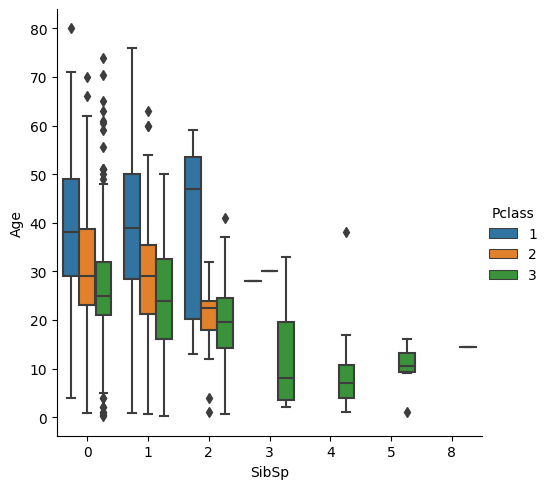

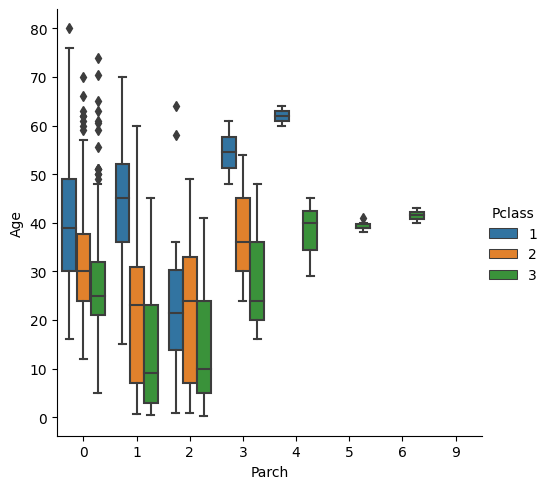

In [57]:
sns.catplot(data=combine, x='Sex', y='Age',hue='Pclass', kind='box')
sns.catplot(data=combine, x='SibSp', y='Age',hue='Pclass', kind='box')
sns.catplot(data=combine, x='Parch', y='Age',hue='Pclass', kind='box')


In [58]:
# sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis=1).corr(), annot=True, fmt='.2f', cmap='coolwarm')

<Axes: >

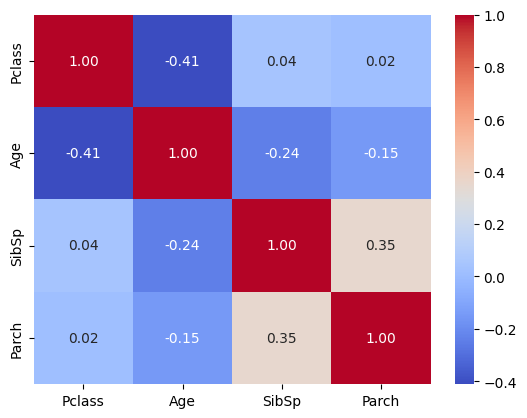

In [59]:
sns.heatmap(combine[['Pclass', 'Age', 'SibSp', 'Parch']].corr(), annot=True, fmt='.2f', cmap='coolwarm')

# Cocnclusions
* Age values have strong correlation with Pclass and smaller but still signifiacant with SibSp and Parch columns.
* This means that we can fill empty Age values with those of Age where Pclass, SibSp, and Parch are the same.
* When the same values can't be found we will use median value for whole age column.

In [60]:
age_nan_idicies = list(combine.Age[combine.Age.isnull()].index)
age_nan_idicies

[5,
 17,
 19,
 26,
 27,
 28,
 30,
 31,
 35,
 41,
 44,
 45,
 46,
 47,
 54,
 63,
 64,
 75,
 76,
 81,
 86,
 93,
 99,
 105,
 107,
 119,
 124,
 126,
 138,
 152,
 156,
 163,
 165,
 173,
 177,
 181,
 182,
 192,
 194,
 209,
 218,
 224,
 230,
 235,
 236,
 245,
 251,
 255,
 259,
 265,
 269,
 272,
 279,
 290,
 293,
 295,
 296,
 298,
 299,
 301,
 324,
 328,
 329,
 340,
 344,
 347,
 351,
 352,
 357,
 360,
 361,
 368,
 377,
 381,
 402,
 403,
 404,
 406,
 408,
 413,
 418,
 421,
 424,
 437,
 444,
 447,
 450,
 452,
 457,
 459,
 461,
 463,
 468,
 474,
 478,
 483,
 488,
 490,
 495,
 500,
 504,
 510,
 515,
 517,
 520,
 524,
 526,
 531,
 540,
 545,
 550,
 553,
 556,
 557,
 561,
 566,
 571,
 577,
 582,
 586,
 589,
 591,
 594,
 595,
 604,
 605,
 606,
 622,
 626,
 632,
 636,
 641,
 643,
 646,
 649,
 660,
 662,
 667,
 673,
 685,
 690,
 702,
 704,
 711,
 720,
 725,
 731,
 732,
 733,
 753,
 759,
 761,
 766,
 769,
 771,
 776,
 783,
 785,
 807,
 817,
 818,
 820,
 824,
 829,
 831,
 840,
 850,
 858,
 868,
 878,
 891

In [61]:
# age_nan_idicies_loc = list(combine.loc[combine.Age.isnull()].index)

In [62]:
# age_nan_idicies_iloc = list(combine.iloc[combine.Age.isnull().values].index)

In [63]:
for index in age_nan_idicies:
    median_age = combine.Age.median()
    predicted_age = combine.Age[(combine.SibSp == combine.loc[index, 'SibSp']) 
                                & (combine.Parch == combine.loc[index, 'Parch'])
                                & (combine.Pclass == combine.loc[index, 'Pclass'])].median()
    if np.isnan(predicted_age):
        combine.loc[index, 'Age'] = median_age
    else:
        combine.loc[index, 'Age'] = predicted_age
                                   

In [64]:
combine.Age.isnull().sum()

0

In [65]:
combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


### 5.3 Feature engineering
Its the proces of creating new features from existing ones to better represent the problem to the predictive models resulting in better accuracy on unseen data.

We construct 3 new features:
* Title
* FamilySize & IsAlone
* Age*Class
  
Additionally:

* Multi indexing for new features against target feature "Survived".


#### 5.3.1 Title

In [66]:
# Title
combine.head()
combine.Name.dtype

dtype('O')

In [67]:
combine['Title'] = [names.split(',')[1].split('.')[0].strip() for names in combine.Name]

In [68]:
combine.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S,Mr
5,6,0.0,3,"Moran, Mr. James",0,25.0,0,0,2.135148,Q,Mr
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,3.948596,S,Mr
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,3.048088,S,Master
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,2.409941,S,Mrs
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,3.403555,C,Mrs


In [69]:
for idx, title in enumerate(combine.Title):
    print(f"Title: '{title}', Age: {combine.loc[idx, 'Age']}, Sex: {combine.loc[idx, 'Sex']}, Survived: {combine.loc[idx, 'Survived']}")

Title: 'Mr', Age: 22.0, Sex: 0, Survived: 0.0
Title: 'Mrs', Age: 38.0, Sex: 1, Survived: 1.0
Title: 'Miss', Age: 26.0, Sex: 1, Survived: 1.0
Title: 'Mrs', Age: 35.0, Sex: 1, Survived: 1.0
Title: 'Mr', Age: 35.0, Sex: 0, Survived: 0.0
Title: 'Mr', Age: 25.0, Sex: 0, Survived: 0.0
Title: 'Mr', Age: 54.0, Sex: 0, Survived: 0.0
Title: 'Master', Age: 2.0, Sex: 0, Survived: 0.0
Title: 'Mrs', Age: 27.0, Sex: 1, Survived: 1.0
Title: 'Mrs', Age: 14.0, Sex: 1, Survived: 1.0
Title: 'Miss', Age: 4.0, Sex: 1, Survived: 1.0
Title: 'Miss', Age: 58.0, Sex: 1, Survived: 1.0
Title: 'Mr', Age: 20.0, Sex: 0, Survived: 0.0
Title: 'Mr', Age: 39.0, Sex: 0, Survived: 0.0
Title: 'Miss', Age: 14.0, Sex: 1, Survived: 0.0
Title: 'Mrs', Age: 55.0, Sex: 1, Survived: 1.0
Title: 'Master', Age: 2.0, Sex: 0, Survived: 0.0
Title: 'Mr', Age: 30.0, Sex: 0, Survived: 1.0
Title: 'Mrs', Age: 31.0, Sex: 1, Survived: 0.0
Title: 'Mrs', Age: 25.0, Sex: 1, Survived: 1.0
Title: 'Mr', Age: 35.0, Sex: 0, Survived: 0.0
Title: 'Mr', A

In [70]:
combine.drop('Name', axis=1, inplace=True)

In [71]:
# Check new feature against tgt

In [72]:
combine.Title.value_counts()

Title
Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [73]:
combine.Title.nunique()

18

In [74]:
combine.Title = combine.Title.replace(['Rev', 'Dr', 'Col', 'Major', 'Lady', 'Sir', 'Don', 'Capt' ,'the Countess', 'Jonkheer', 'Dona'], 'Rare')

In [75]:
combine.Title = combine.Title.replace(['Ms', 'Mlle'], 'Miss')
combine.Title = combine.Title.replace('Mme', 'Mrs')

In [76]:
combine.Title.value_counts()

Title
Mr        753
Miss      259
Mrs       198
Master     60
Rare       29
Name: count, dtype: int64

In [77]:
combine[['Title', 'Survived']].groupby('Title', as_index = False).mean().sort_values('Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


In [78]:
combine['Title'] = combine['Title'].astype('category')

<Axes: xlabel='Title', ylabel='count'>

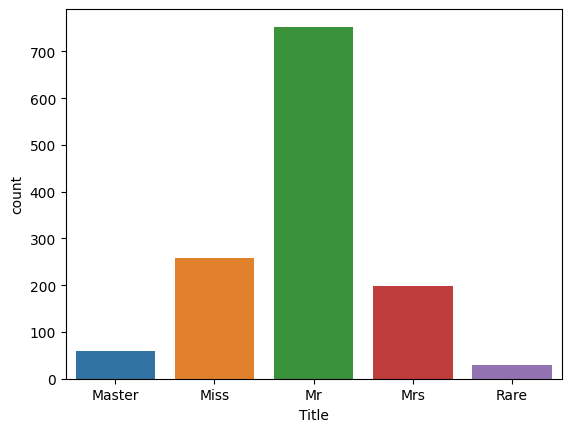

In [79]:
sns.countplot(data=combine, x='Title')

Text(9.444444444444445, 0.5, 'Survival probality')

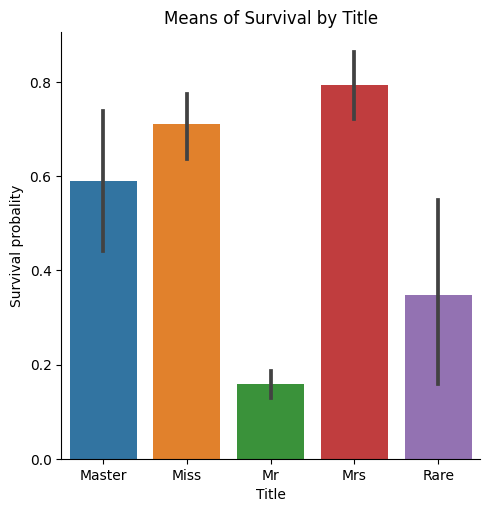

In [80]:
sns.catplot(data=combine, x="Title", y='Survived', kind='bar')
plt.title('Means of Survival by Title')
plt.ylabel('Survival probality')

#### 5.3.2 FamilySize & IsAlone

In [81]:
combine['FamilySize'] = combine.SibSp + combine.Parch + 1

In [82]:
combine[['SibSp', 'Parch', 'FamilySize']]

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
...,...,...,...
1294,0,0,1
1295,0,0,1
1296,0,0,1
1297,0,0,1


In [83]:
combine['FamilySize'].value_counts()

FamilySize
1     790
2     235
3     159
4      43
5      22
6      22
7      16
8       8
11      4
Name: count, dtype: int64

In [84]:
combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values('Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [85]:
combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [86]:
combine.IsAlone.value_counts()

IsAlone
1    790
0    509
Name: count, dtype: int64

In [87]:
combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values('Survived', ascending=False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [88]:
combine.drop(['SibSp', 'Parch'], axis=1, inplace=True)
combine.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,2,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,2,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,2,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1,1
5,6,0.0,3,0,25.0,2.135148,Q,Mr,1,1
6,7,0.0,1,0,54.0,3.948596,S,Mr,1,1
7,8,0.0,3,0,2.0,3.048088,S,Master,5,0
8,9,1.0,3,1,27.0,2.409941,S,Mrs,3,0
9,10,1.0,2,1,14.0,3.403555,C,Mrs,2,0


#### 5.3.3 Age*Class

In [89]:
combine['AgeBand'] = pd.cut(combine.Age, 5)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,AgeBand
0,1,0.0,3,0,22.0,1.981001,S,Mr,2,0,"(16.136, 32.102]"
1,2,1.0,1,1,38.0,4.266662,C,Mrs,2,0,"(32.102, 48.068]"
2,3,1.0,3,1,26.0,2.070022,S,Miss,1,1,"(16.136, 32.102]"
3,4,1.0,1,1,35.0,3.972177,S,Mrs,2,0,"(32.102, 48.068]"
4,5,0.0,3,0,35.0,2.085672,S,Mr,1,1,"(32.102, 48.068]"


In [90]:
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values('Survived', ascending=False)

,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
3,"(48.068, 64.034]",0.434783
2,"(32.102, 48.068]",0.412844
1,"(16.136, 32.102]",0.339662
4,"(64.034, 80.0]",0.090909


In [91]:
combine.groupby(['Pclass','Age', 'Sex'], as_index=False).agg({'Survived': pd.Series.sum})

,Pclass,Age,Sex,Survived
0,1,0.92,0,1.0
1,1,2.00,1,0.0
2,1,4.00,0,1.0
3,1,6.00,0,0.0
4,1,11.00,0,1.0
...,...,...,...,...
330,3,61.00,0,0.0
331,3,63.00,1,1.0
332,3,65.00,0,0.0
333,3,70.50,0,0.0


In [92]:
combine.loc[combine.Age <= 16.136, 'Age'] = 1
combine.loc[(combine.Age > 16.136) & (combine.Age <= 32.102), 'Age'] = 2
combine.loc[(combine.Age > 32.102) & (combine.Age <= 48.068), 'Age'] = 3
combine.loc[(combine.Age > 48.068) & (combine.Age <= 64.034), 'Age'] = 4
combine.loc[(combine.Age >  64.034) & (combine.Age <= 80.0), 'Age'] = 5

There is only one passenger  in data set that survived, is a female, in age group 4.0 from 3 class.
We need to drop that row.


In [93]:
to_drop = combine[(combine.Sex == 1) & (combine.Age == 4.0) & (combine.Pclass == 3)].index
to_drop

Index([476], dtype='int64')

In [94]:
combine.drop(to_drop, axis=0, inplace=True)

In [95]:
combine.reset_index(drop=True)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,AgeBand
0,1,0.0,3,0,2.0,1.981001,S,Mr,2,0,"(16.136, 32.102]"
1,2,1.0,1,1,3.0,4.266662,C,Mrs,2,0,"(32.102, 48.068]"
2,3,1.0,3,1,2.0,2.070022,S,Miss,1,1,"(16.136, 32.102]"
3,4,1.0,1,1,3.0,3.972177,S,Mrs,2,0,"(32.102, 48.068]"
4,5,0.0,3,0,3.0,2.085672,S,Mr,1,1,"(32.102, 48.068]"
...,...,...,...,...,...,...,...,...,...,...,...
1293,1305,NaN,3,0,2.0,2.085672,S,Mr,1,1,"(16.136, 32.102]"
1294,1306,NaN,1,1,3.0,4.690430,C,Rare,1,1,"(32.102, 48.068]"
1295,1307,NaN,3,0,3.0,1.981001,S,Mr,1,1,"(32.102, 48.068]"
1296,1308,NaN,3,0,2.0,2.085672,S,Mr,1,1,"(16.136, 32.102]"


In [96]:
combine[(combine.Sex == 1) & (combine.Age == 4.0) & (combine.Pclass == 3)]

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,AgeBand


In [97]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,AgeBand
0,1,0.0,3,0,2.0,1.981001,S,Mr,2,0,"(16.136, 32.102]"
1,2,1.0,1,1,3.0,4.266662,C,Mrs,2,0,"(32.102, 48.068]"
2,3,1.0,3,1,2.0,2.070022,S,Miss,1,1,"(16.136, 32.102]"
3,4,1.0,1,1,3.0,3.972177,S,Mrs,2,0,"(32.102, 48.068]"
4,5,0.0,3,0,3.0,2.085672,S,Mr,1,1,"(32.102, 48.068]"


In [98]:
combine.Age = combine.Age.astype(int)

In [99]:
combine.Age.dtype

dtype('int32')

In [100]:
combine.drop('AgeBand', axis=1, inplace=True)

In [101]:
combine.Pclass = combine.Pclass.astype('int')

In [102]:
combine['AgeClass'] = combine.Age * combine.Pclass

In [103]:
combine['AgeClass'] = combine['AgeClass'].astype(int)

In [104]:
combine[['Age', 'Pclass', 'AgeClass']].head(5)

,Age,Pclass,AgeClass
0,2,3,6
1,3,1,3
2,2,3,6
3,3,1,3
4,3,3,9


In [105]:
combine[['Age', 'Survived']].groupby('Age', as_index=False).mean().sort_values('Survived', ascending=False)

,Age,Survived
0,1,0.532110
3,4,0.426471
2,3,0.412844
1,2,0.339662
4,5,0.090909


In [106]:
combine[['AgeClass','Survived']].groupby('AgeClass').mean().sort_values('Survived', ascending=False)

,Survived
AgeClass,
1,0.888889
2,0.779221
3,0.516854
4,0.456522
8,0.352941
6,0.274194
5,0.166667
9,0.100000
10,0.000000


#### 5.3.4 Multi indexing for new features against target feature

##### Class, Age, and Sex grouped to see their mean of Survival

In [107]:
combine.groupby(['Pclass', 'Age', 'Sex'], as_index=False).agg({'Survived': pd.Series.mean})

,Pclass,Age,Sex,Survived
0,1,1,0,1.000000
1,1,1,1,0.833333
2,1,2,0,0.461538
3,1,2,1,0.966667
4,1,3,0,0.366667
5,1,3,1,1.000000
6,1,4,0,0.269231
7,1,4,1,0.941176
8,1,5,0,0.166667
9,1,5,1,NaN


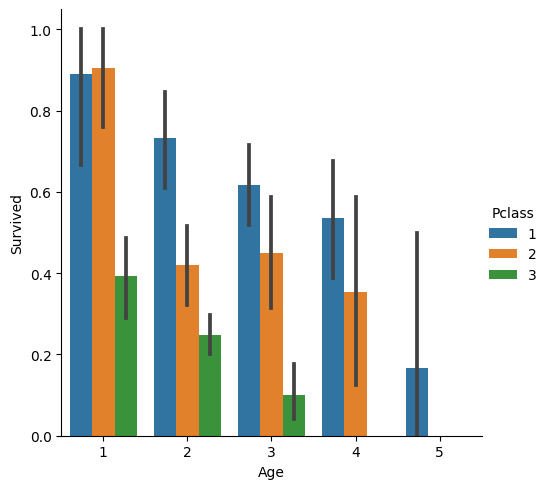

In [108]:
sns.catplot(data=combine, x='Age', y='Survived', hue='Pclass', kind='bar')

##### The sum of survived in each group and sum of all survived by class.

In [109]:
survived_sum = combine.groupby(['Pclass', 'Age', 'Sex'], as_index=False).agg({'Survived': pd.Series.sum})
survived_sum

,Pclass,Age,Sex,Survived
0,1,1,0,3.0
1,1,1,1,5.0
2,1,2,0,12.0
3,1,2,1,29.0
4,1,3,0,22.0
5,1,3,1,39.0
6,1,4,0,7.0
7,1,4,1,16.0
8,1,5,0,1.0
9,1,5,1,0.0


In [110]:
survived_sum.groupby(['Pclass',	'Age', 'Sex']).sum()

Survived
Pclass Age Sex          
1      1   0         3.0
           1         5.0
       2   0        12.0
           1        29.0
       3   0        22.0
           1        39.0
       4   0         7.0
           1        16.0
       5   0         1.0
           1         0.0
2      1   0         9.0
           1        10.0
       2   0         5.0
           1        35.0
       3   0         2.0
           1        20.0
       4   0         1.0
           1         5.0
       5   0         0.0
3      1   0        12.0
           1        19.0
       2   0        32.0
           1        48.0
       3   0         3.0
           1         4.0
       4   0         0.0
       5   0         0.0

In [111]:
survived_sum.groupby(['Pclass',	'Age', 'Sex']).sum().groupby(level=0).cumsum()

Survived
Pclass Age Sex          
1      1   0         3.0
           1         8.0
       2   0        20.0
           1        49.0
       3   0        71.0
           1       110.0
       4   0       117.0
           1       133.0
       5   0       134.0
           1       134.0
2      1   0         9.0
           1        19.0
       2   0        24.0
           1        59.0
       3   0        61.0
           1        81.0
       4   0        82.0
           1        87.0
       5   0        87.0
3      1   0        12.0
           1        31.0
       2   0        63.0
           1       111.0
       3   0       114.0
           1       118.0
       4   0       118.0
       5   0       118.0

##### The mean of survived in each group and mean of all survived by class.

In [112]:
survived_mean = combine.groupby(['Pclass', 'Age', 'Sex'], as_index=False).agg({'Survived': pd.Series.mean})
survived_mean

,Pclass,Age,Sex,Survived
0,1,1,0,1.000000
1,1,1,1,0.833333
2,1,2,0,0.461538
3,1,2,1,0.966667
4,1,3,0,0.366667
5,1,3,1,1.000000
6,1,4,0,0.269231
7,1,4,1,0.941176
8,1,5,0,0.166667
9,1,5,1,NaN


In [113]:
survived_mean.groupby(['Pclass','Age', 'Sex']).mean()

Survived
Pclass Age Sex          
1      1   0    1.000000
           1    0.833333
       2   0    0.461538
           1    0.966667
       3   0    0.366667
           1    1.000000
       4   0    0.269231
           1    0.941176
       5   0    0.166667
           1         NaN
2      1   0    0.818182
           1    1.000000
       2   0    0.087719
           1    0.921053
       3   0    0.074074
           1    0.909091
       4   0    0.090909
           1    0.833333
       5   0    0.000000
3      1   0    0.292683
           1    0.500000
       2   0    0.135021
           1    0.558140
       3   0    0.055556
           1    0.250000
       4   0    0.000000
       5   0    0.000000

In [114]:
pivot_data = survived_mean.pivot_table(index='Age', columns=['Pclass', 'Sex'], values='Survived', aggfunc='mean')

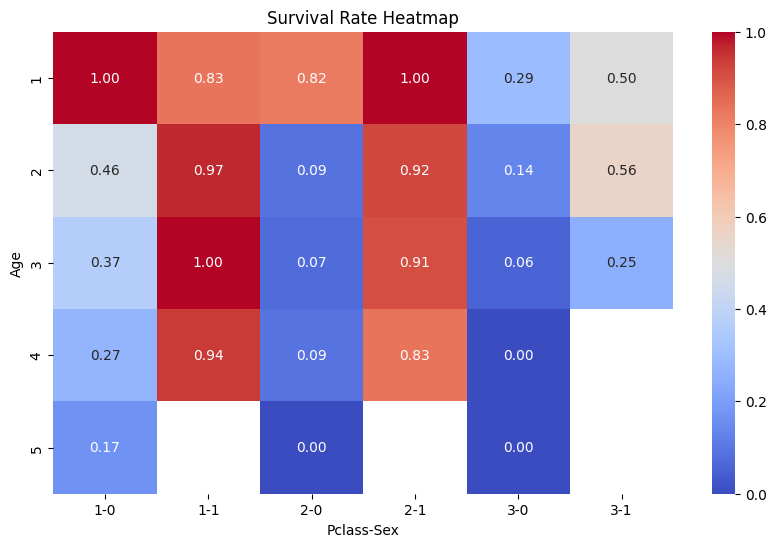

In [115]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Survival Rate Heatmap")
plt.show()

<Axes: >

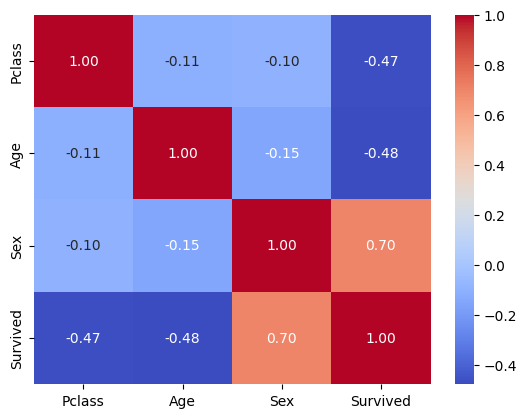

In [116]:
sns.heatmap(survived_mean.corr(), annot=True, fmt='.2f', cmap='coolwarm')

### 5.4 Feature encoding

ML model require all input ond output variables to be numeric. Therfore all categorical data must be encoded before fitting into the models.

In [117]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,AgeClass
0,1,0.0,3,0,2,1.981001,S,Mr,2,0,6
1,2,1.0,1,1,3,4.266662,C,Mrs,2,0,3
2,3,1.0,3,1,2,2.070022,S,Miss,1,1,6
3,4,1.0,1,1,3,3.972177,S,Mrs,2,0,3
4,5,0.0,3,0,3,2.085672,S,Mr,1,1,9


In [118]:
# Encoding categorical variables "Title" and "Embarked" with pandas get_dummies.
combine = pd.get_dummies(combine, columns=['Title'])
combine = pd.get_dummies(combine, columns=['Embarked'], prefix='Em')

In [119]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,FamilySize,IsAlone,AgeClass,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,2,1.981001,2,0,6,False,False,True,False,False,False,False,True
1,2,1.0,1,1,3,4.266662,2,0,3,False,False,False,True,False,True,False,False
2,3,1.0,3,1,2,2.070022,1,1,6,False,True,False,False,False,False,False,True
3,4,1.0,1,1,3,3.972177,2,0,3,False,False,False,True,False,False,False,True
4,5,0.0,3,0,3,2.085672,1,1,9,False,False,True,False,False,False,False,True


In [120]:
combine[['Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Em_C', 'Em_Q',	'Em_S']] = combine[['Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Em_C', 'Em_Q',	'Em_S']].astype(int)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,FamilySize,IsAlone,AgeClass,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,2,1.981001,2,0,6,0,0,1,0,0,0,0,1
1,2,1.0,1,1,3,4.266662,2,0,3,0,0,0,1,0,1,0,0
2,3,1.0,3,1,2,2.070022,1,1,6,0,1,0,0,0,0,0,1
3,4,1.0,1,1,3,3.972177,2,0,3,0,0,0,1,0,0,0,1
4,5,0.0,3,0,3,2.085672,1,1,9,0,0,1,0,0,0,0,1


#### 5.3.4 Fare into Groups


In [121]:
combine['FareBand'] = pd.cut(combine.Fare, 4)
combine[['Survived', 'FareBand']].groupby('FareBand', as_index=False).mean().sort_values('Survived', ascending=False)


,FareBand,Survived
3,"(4.679, 6.239]",0.750000
2,"(3.119, 4.679]",0.517007
1,"(1.56, 3.119]",0.287356
0,"(-0.00624, 1.56]",0.062500


In [122]:
combine.loc[combine.Fare <= 1.56, 'Fare'] = 0
combine.loc[(combine.Fare > 1.56) & (combine.Fare <= 3.119), 'Fare'] = 1
combine.loc[(combine.Fare > 3.119) & (combine.Fare <= 4.679), 'Fare'] = 2
combine.loc[(combine.Fare > 4.679) & (combine.Fare <= 6.239), 'Fare'] = 3

In [123]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,FamilySize,IsAlone,AgeClass,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S,FareBand
0,1,0.0,3,0,2,1.0,2,0,6,0,0,1,0,0,0,0,1,"(1.56, 3.119]"
1,2,1.0,1,1,3,2.0,2,0,3,0,0,0,1,0,1,0,0,"(3.119, 4.679]"
2,3,1.0,3,1,2,1.0,1,1,6,0,1,0,0,0,0,0,1,"(1.56, 3.119]"
3,4,1.0,1,1,3,2.0,2,0,3,0,0,0,1,0,0,0,1,"(3.119, 4.679]"
4,5,0.0,3,0,3,1.0,1,1,9,0,0,1,0,0,0,0,1,"(1.56, 3.119]"


In [124]:
# drop FareBand
combine.drop('FareBand', axis=1, inplace=True)

In [125]:
combine.Fare = combine.Fare.astype(int)

In [126]:
combine.Fare.value_counts()

Fare
1    777
2    424
3     78
0     19
Name: count, dtype: int64

In [127]:
# Separate training and test set from the combined df
# train= combine[:len(train)]
# test = combine[len(train): ]

train = combine[combine.Survived.notnull()]
test = combine[combine.Survived.isnull()]

In [128]:
print(train.shape)
print(submission.shape)
test.shape

(880, 17)
(418, 2)


(418, 17)

In [129]:
train.drop('PassengerId', axis=1, inplace=True)

In [130]:
test.drop('PassengerId', axis=1, inplace=True)

In [131]:
train.Survived.isnull().sum()

0

In [132]:
train['Survived'] = train['Survived'].astype(int)

In [133]:
train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,IsAlone,AgeClass,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,2,1,2,0,6,0,0,1,0,0,0,0,1
1,1,1,1,3,2,2,0,3,0,0,0,1,0,1,0,0
2,1,3,1,2,1,1,1,6,0,1,0,0,0,0,0,1
3,1,1,1,3,2,2,0,3,0,0,0,1,0,0,0,1
4,0,3,0,3,1,1,1,9,0,0,1,0,0,0,0,1


In [134]:
test.head()


,Survived,Pclass,Sex,Age,Fare,FamilySize,IsAlone,AgeClass,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,NaN,3,0,3,1,1,1,9,0,0,1,0,0,0,1,0
882,NaN,3,1,3,1,2,0,9,0,0,0,1,0,0,0,1
883,NaN,2,0,4,1,1,1,8,0,0,1,0,0,0,1,0
884,NaN,3,0,2,1,1,1,6,0,0,1,0,0,0,0,1
885,NaN,3,1,2,1,3,0,6,0,0,0,1,0,0,0,1


In [135]:
test.drop('Survived', axis=1, inplace=True)

In [136]:
test.shape

(418, 15)

In [137]:
test.head()

,Pclass,Sex,Age,Fare,FamilySize,IsAlone,AgeClass,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,3,0,3,1,1,1,9,0,0,1,0,0,0,1,0
882,3,1,3,1,2,0,9,0,0,0,1,0,0,0,1
883,2,0,4,1,1,1,8,0,0,1,0,0,0,1,0
884,3,0,2,1,1,1,6,0,0,1,0,0,0,0,1
885,3,1,2,1,3,0,6,0,0,0,1,0,0,0,1


### 6. Modeling

Titanic is a classification problem, so we need to use classification models, also known as classifiers to make predictions. Chosen classifiers:

* Logistic Regression
* Support Vector Machines
* K-Nearest Neighbours
* Gausian naive bayes
* Perception
* Linear SVC
* Stochastic gradnient descent
* Decision tree
* Random Forest
* CatBoost

### 6.1 Split Training Data

In [140]:
target = train['Survived']
features = train.drop('Survived', axis=1)

X_train, X_test,y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 10)

# 2 method:
# X_train = train.drop('Survived', axis=1)
# y_train = train['Survived']
# X_test = test

# print('X_train shape: ',X_train.shape)
# print('X_train shape: ',Y_train.shape)
# print('X_train shape: ',X_test.shape)


### 6.2 Fit the model to make predictions
This requires 3 simple steps: instantiate the model, fit the model to the trainig data set, and predict data in test set.

#### 6.2.1 Logistic Regression

In [1575]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
Y_pred = log_reg.predict(X_test)
train_score = log_reg.score(X_train, y_train)
print(f'the train score is: {train_score:.2}%')
acc_score = accuracy_score(y_test, Y_pred)
print(f'the accuracy score is: {acc_score:.2}%')

the train score is: 0.82%
the accuracy score is: 0.86%


In [1578]:

regr_coef = pd.DataFrame(data=log_reg.coef_, index=['coefs'], columns=X_train.columns)
regr_coef

,Pclass,Sex,Age,Fare,FamilySize,IsAlone,AgeClass,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
coefs,-0.438252,1.194991,-0.029736,0.252468,-0.539331,-0.346735,-0.232149,1.462443,-0.023345,-1.500338,0.994109,-0.933255,0.276607,-0.012312,-0.264681


#### 6.2.2 Support Vector Machines

#### 6.2.3 K- Nearest Neigbours

#### 6.2.4 Gaussian naive bayes

#### 6.2.5 Perceptron

#### 6.2.6 Linear SVC

#### 6.2.7 Stochastic gradient descent

#### 6.2.8 Random Forest

#### 6.2.9 Decision Tree

#### 6.2.10 CatBoost

### 6.3 Model evaluation and hyper tuning
Select the model with highest accuracy

#### 6.3.1 Training accuracy

In [ ]:
models = pd.DataFrame({

#### 6.3.2 K-fold cross validation
Impresive training accuracy is not the most important factor. We should focus on model ability to predict from data it has not seen before.

In [ ]:
classifiers = []

                   

In [ ]:
cv_results = []


262:	learn: 0.3694603	total: 419ms	remaining: 1.17s
263:	learn: 0.3691851	total: 420ms	remaining: 1.17s
264:	learn: 0.3691295	total: 422ms	remaining: 1.17s
265:	learn: 0.3689966	total: 424ms	remaining: 1.17s
266:	learn: 0.3688115	total: 425ms	remaining: 1.17s
267:	learn: 0.3687825	total: 427ms	remaining: 1.17s
268:	learn: 0.3684183	total: 428ms	remaining: 1.16s
269:	learn: 0.3682058	total: 430ms	remaining: 1.16s
270:	learn: 0.3681500	total: 431ms	remaining: 1.16s
271:	learn: 0.3678973	total: 433ms	remaining: 1.16s
272:	learn: 0.3676103	total: 435ms	remaining: 1.16s
273:	learn: 0.3675670	total: 436ms	remaining: 1.16s
274:	learn: 0.3673872	total: 438ms	remaining: 1.15s
275:	learn: 0.3671734	total: 440ms	remaining: 1.15s
276:	learn: 0.3670758	total: 441ms	remaining: 1.15s
277:	learn: 0.3669838	total: 443ms	remaining: 1.15s
278:	learn: 0.3668421	total: 444ms	remaining: 1.15s
279:	learn: 0.3666191	total: 446ms	remaining: 1.15s
280:	learn: 0.3665513	total: 448ms	remaining: 1.15s
281:	learn: 

474:	learn: 0.3471495	total: 756ms	remaining: 836ms
475:	learn: 0.3470837	total: 758ms	remaining: 834ms
476:	learn: 0.3470505	total: 760ms	remaining: 833ms
477:	learn: 0.3470362	total: 761ms	remaining: 831ms
478:	learn: 0.3468975	total: 763ms	remaining: 830ms
479:	learn: 0.3468379	total: 764ms	remaining: 828ms
480:	learn: 0.3467899	total: 766ms	remaining: 827ms
481:	learn: 0.3467761	total: 768ms	remaining: 825ms
482:	learn: 0.3467010	total: 769ms	remaining: 824ms
483:	learn: 0.3466752	total: 771ms	remaining: 822ms
484:	learn: 0.3466161	total: 773ms	remaining: 820ms
485:	learn: 0.3465324	total: 774ms	remaining: 819ms
486:	learn: 0.3464822	total: 776ms	remaining: 817ms
487:	learn: 0.3464364	total: 778ms	remaining: 816ms
488:	learn: 0.3463862	total: 779ms	remaining: 815ms
489:	learn: 0.3462695	total: 781ms	remaining: 813ms
490:	learn: 0.3461121	total: 783ms	remaining: 811ms
491:	learn: 0.3460813	total: 785ms	remaining: 810ms
492:	learn: 0.3460434	total: 786ms	remaining: 809ms
493:	learn: 

692:	learn: 0.3368338	total: 1.09s	remaining: 485ms
693:	learn: 0.3367929	total: 1.1s	remaining: 483ms
694:	learn: 0.3367647	total: 1.1s	remaining: 482ms
695:	learn: 0.3367224	total: 1.1s	remaining: 480ms
696:	learn: 0.3366813	total: 1.1s	remaining: 479ms
697:	learn: 0.3366084	total: 1.1s	remaining: 477ms
698:	learn: 0.3366017	total: 1.1s	remaining: 475ms
699:	learn: 0.3365771	total: 1.1s	remaining: 474ms
700:	learn: 0.3365580	total: 1.11s	remaining: 472ms
701:	learn: 0.3365105	total: 1.11s	remaining: 470ms
702:	learn: 0.3364556	total: 1.11s	remaining: 469ms
703:	learn: 0.3364187	total: 1.11s	remaining: 467ms
704:	learn: 0.3364185	total: 1.11s	remaining: 466ms
705:	learn: 0.3364005	total: 1.11s	remaining: 464ms
706:	learn: 0.3363715	total: 1.11s	remaining: 462ms
707:	learn: 0.3363392	total: 1.12s	remaining: 461ms
708:	learn: 0.3363230	total: 1.12s	remaining: 459ms
709:	learn: 0.3361872	total: 1.12s	remaining: 458ms
710:	learn: 0.3361627	total: 1.12s	remaining: 456ms
711:	learn: 0.33611

913:	learn: 0.3285519	total: 1.44s	remaining: 135ms
914:	learn: 0.3285190	total: 1.44s	remaining: 134ms
915:	learn: 0.3284450	total: 1.44s	remaining: 132ms
916:	learn: 0.3284168	total: 1.44s	remaining: 130ms
917:	learn: 0.3283639	total: 1.44s	remaining: 129ms
918:	learn: 0.3283030	total: 1.44s	remaining: 127ms
919:	learn: 0.3282602	total: 1.45s	remaining: 126ms
920:	learn: 0.3282166	total: 1.45s	remaining: 124ms
921:	learn: 0.3281998	total: 1.45s	remaining: 123ms
922:	learn: 0.3281721	total: 1.45s	remaining: 121ms
923:	learn: 0.3281321	total: 1.45s	remaining: 119ms
924:	learn: 0.3280798	total: 1.45s	remaining: 118ms
925:	learn: 0.3280540	total: 1.46s	remaining: 116ms
926:	learn: 0.3280145	total: 1.46s	remaining: 115ms
927:	learn: 0.3279693	total: 1.46s	remaining: 113ms
928:	learn: 0.3279523	total: 1.46s	remaining: 112ms
929:	learn: 0.3279008	total: 1.46s	remaining: 110ms
930:	learn: 0.3278567	total: 1.46s	remaining: 108ms
931:	learn: 0.3278217	total: 1.46s	remaining: 107ms
932:	learn: 

112:	learn: 0.4136135	total: 173ms	remaining: 1.36s
113:	learn: 0.4131114	total: 175ms	remaining: 1.36s
114:	learn: 0.4124041	total: 177ms	remaining: 1.36s
115:	learn: 0.4113843	total: 179ms	remaining: 1.36s
116:	learn: 0.4110196	total: 180ms	remaining: 1.36s
117:	learn: 0.4106290	total: 182ms	remaining: 1.36s
118:	learn: 0.4098426	total: 183ms	remaining: 1.36s
119:	learn: 0.4092544	total: 185ms	remaining: 1.35s
120:	learn: 0.4089427	total: 186ms	remaining: 1.35s
121:	learn: 0.4082957	total: 188ms	remaining: 1.35s
122:	learn: 0.4077346	total: 189ms	remaining: 1.35s
123:	learn: 0.4068470	total: 191ms	remaining: 1.35s
124:	learn: 0.4060677	total: 192ms	remaining: 1.35s
125:	learn: 0.4054200	total: 194ms	remaining: 1.35s
126:	learn: 0.4051095	total: 196ms	remaining: 1.35s
127:	learn: 0.4045765	total: 198ms	remaining: 1.35s
128:	learn: 0.4038570	total: 199ms	remaining: 1.34s
129:	learn: 0.4030421	total: 201ms	remaining: 1.34s
130:	learn: 0.4021962	total: 202ms	remaining: 1.34s
131:	learn: 

333:	learn: 0.3539982	total: 513ms	remaining: 1.02s
334:	learn: 0.3539251	total: 514ms	remaining: 1.02s
335:	learn: 0.3537524	total: 516ms	remaining: 1.02s
336:	learn: 0.3536550	total: 517ms	remaining: 1.02s
337:	learn: 0.3535120	total: 519ms	remaining: 1.02s
338:	learn: 0.3534278	total: 520ms	remaining: 1.01s
339:	learn: 0.3534095	total: 522ms	remaining: 1.01s
340:	learn: 0.3532969	total: 523ms	remaining: 1.01s
341:	learn: 0.3531726	total: 525ms	remaining: 1.01s
342:	learn: 0.3530092	total: 527ms	remaining: 1.01s
343:	learn: 0.3529089	total: 528ms	remaining: 1.01s
344:	learn: 0.3528524	total: 530ms	remaining: 1s
345:	learn: 0.3527179	total: 538ms	remaining: 1.02s
346:	learn: 0.3525974	total: 540ms	remaining: 1.01s
347:	learn: 0.3525706	total: 541ms	remaining: 1.01s
348:	learn: 0.3524760	total: 543ms	remaining: 1.01s
349:	learn: 0.3523935	total: 545ms	remaining: 1.01s
350:	learn: 0.3523223	total: 547ms	remaining: 1.01s
351:	learn: 0.3522844	total: 548ms	remaining: 1.01s
352:	learn: 0.3

552:	learn: 0.3403979	total: 853ms	remaining: 689ms
553:	learn: 0.3403540	total: 854ms	remaining: 688ms
554:	learn: 0.3402886	total: 856ms	remaining: 686ms
555:	learn: 0.3402489	total: 858ms	remaining: 685ms
556:	learn: 0.3401897	total: 859ms	remaining: 683ms
557:	learn: 0.3401846	total: 860ms	remaining: 682ms
558:	learn: 0.3401385	total: 862ms	remaining: 680ms
559:	learn: 0.3400179	total: 863ms	remaining: 678ms
560:	learn: 0.3399827	total: 865ms	remaining: 677ms
561:	learn: 0.3399327	total: 867ms	remaining: 675ms
562:	learn: 0.3398518	total: 868ms	remaining: 674ms
563:	learn: 0.3397848	total: 870ms	remaining: 673ms
564:	learn: 0.3397622	total: 872ms	remaining: 671ms
565:	learn: 0.3397076	total: 873ms	remaining: 670ms
566:	learn: 0.3396780	total: 875ms	remaining: 668ms
567:	learn: 0.3396301	total: 877ms	remaining: 667ms
568:	learn: 0.3395867	total: 878ms	remaining: 665ms
569:	learn: 0.3395311	total: 880ms	remaining: 664ms
570:	learn: 0.3394533	total: 882ms	remaining: 662ms
571:	learn: 

775:	learn: 0.3311943	total: 1.19s	remaining: 345ms
776:	learn: 0.3311509	total: 1.2s	remaining: 343ms
777:	learn: 0.3311046	total: 1.2s	remaining: 342ms
778:	learn: 0.3310732	total: 1.2s	remaining: 340ms
779:	learn: 0.3310317	total: 1.2s	remaining: 339ms
780:	learn: 0.3310243	total: 1.2s	remaining: 337ms
781:	learn: 0.3310016	total: 1.2s	remaining: 335ms
782:	learn: 0.3309223	total: 1.2s	remaining: 334ms
783:	learn: 0.3308401	total: 1.21s	remaining: 332ms
784:	learn: 0.3307887	total: 1.21s	remaining: 331ms
785:	learn: 0.3307533	total: 1.21s	remaining: 329ms
786:	learn: 0.3306889	total: 1.21s	remaining: 328ms
787:	learn: 0.3306853	total: 1.21s	remaining: 326ms
788:	learn: 0.3306713	total: 1.21s	remaining: 325ms
789:	learn: 0.3306631	total: 1.22s	remaining: 323ms
790:	learn: 0.3306553	total: 1.22s	remaining: 322ms
791:	learn: 0.3306379	total: 1.22s	remaining: 320ms
792:	learn: 0.3306039	total: 1.22s	remaining: 318ms
793:	learn: 0.3305444	total: 1.22s	remaining: 317ms
794:	learn: 0.33050

989:	learn: 0.3244112	total: 1.53s	remaining: 15.5ms
990:	learn: 0.3243839	total: 1.53s	remaining: 13.9ms
991:	learn: 0.3243378	total: 1.54s	remaining: 12.4ms
992:	learn: 0.3242739	total: 1.54s	remaining: 10.8ms
993:	learn: 0.3242489	total: 1.54s	remaining: 9.29ms
994:	learn: 0.3242322	total: 1.54s	remaining: 7.75ms
995:	learn: 0.3242141	total: 1.54s	remaining: 6.2ms
996:	learn: 0.3241838	total: 1.54s	remaining: 4.65ms
997:	learn: 0.3241626	total: 1.54s	remaining: 3.1ms
998:	learn: 0.3240975	total: 1.55s	remaining: 1.55ms
999:	learn: 0.3240658	total: 1.55s	remaining: 0us
Learning rate set to 0.008475
0:	learn: 0.6869552	total: 1.64ms	remaining: 1.64s
1:	learn: 0.6814552	total: 3.27ms	remaining: 1.63s
2:	learn: 0.6770824	total: 4.59ms	remaining: 1.53s
3:	learn: 0.6717446	total: 6.12ms	remaining: 1.52s
4:	learn: 0.6663332	total: 7.75ms	remaining: 1.54s
5:	learn: 0.6605762	total: 9.27ms	remaining: 1.53s
6:	learn: 0.6552364	total: 10.8ms	remaining: 1.53s
7:	learn: 0.6500314	total: 12.4ms	r

187:	learn: 0.3962956	total: 290ms	remaining: 1.25s
188:	learn: 0.3958803	total: 291ms	remaining: 1.25s
189:	learn: 0.3956484	total: 293ms	remaining: 1.25s
190:	learn: 0.3952890	total: 295ms	remaining: 1.25s
191:	learn: 0.3950270	total: 296ms	remaining: 1.25s
192:	learn: 0.3947536	total: 298ms	remaining: 1.24s
193:	learn: 0.3946227	total: 299ms	remaining: 1.24s
194:	learn: 0.3943851	total: 301ms	remaining: 1.24s
195:	learn: 0.3941644	total: 302ms	remaining: 1.24s
196:	learn: 0.3938269	total: 304ms	remaining: 1.24s
197:	learn: 0.3936101	total: 306ms	remaining: 1.24s
198:	learn: 0.3932935	total: 307ms	remaining: 1.24s
199:	learn: 0.3931133	total: 309ms	remaining: 1.24s
200:	learn: 0.3927978	total: 310ms	remaining: 1.23s
201:	learn: 0.3922420	total: 312ms	remaining: 1.23s
202:	learn: 0.3917740	total: 314ms	remaining: 1.23s
203:	learn: 0.3916888	total: 315ms	remaining: 1.23s
204:	learn: 0.3914225	total: 317ms	remaining: 1.23s
205:	learn: 0.3912396	total: 318ms	remaining: 1.23s
206:	learn: 

406:	learn: 0.3644656	total: 630ms	remaining: 918ms
407:	learn: 0.3643621	total: 632ms	remaining: 917ms
408:	learn: 0.3642634	total: 634ms	remaining: 916ms
409:	learn: 0.3642390	total: 635ms	remaining: 914ms
410:	learn: 0.3641543	total: 637ms	remaining: 913ms
411:	learn: 0.3640335	total: 639ms	remaining: 911ms
412:	learn: 0.3639516	total: 640ms	remaining: 910ms
413:	learn: 0.3638720	total: 642ms	remaining: 908ms
414:	learn: 0.3638670	total: 643ms	remaining: 906ms
415:	learn: 0.3637512	total: 644ms	remaining: 905ms
416:	learn: 0.3635219	total: 646ms	remaining: 903ms
417:	learn: 0.3634446	total: 648ms	remaining: 902ms
418:	learn: 0.3633220	total: 650ms	remaining: 901ms
419:	learn: 0.3632418	total: 652ms	remaining: 900ms
420:	learn: 0.3631814	total: 653ms	remaining: 898ms
421:	learn: 0.3631072	total: 655ms	remaining: 897ms
422:	learn: 0.3630445	total: 656ms	remaining: 895ms
423:	learn: 0.3629642	total: 658ms	remaining: 894ms
424:	learn: 0.3628165	total: 660ms	remaining: 892ms
425:	learn: 

627:	learn: 0.3515885	total: 970ms	remaining: 574ms
628:	learn: 0.3515566	total: 971ms	remaining: 573ms
629:	learn: 0.3515127	total: 973ms	remaining: 571ms
630:	learn: 0.3514872	total: 974ms	remaining: 570ms
631:	learn: 0.3514594	total: 976ms	remaining: 568ms
632:	learn: 0.3514543	total: 977ms	remaining: 567ms
633:	learn: 0.3514143	total: 979ms	remaining: 565ms
634:	learn: 0.3513145	total: 981ms	remaining: 564ms
635:	learn: 0.3512724	total: 982ms	remaining: 562ms
636:	learn: 0.3512562	total: 983ms	remaining: 560ms
637:	learn: 0.3512282	total: 985ms	remaining: 559ms
638:	learn: 0.3512038	total: 986ms	remaining: 557ms
639:	learn: 0.3511228	total: 988ms	remaining: 556ms
640:	learn: 0.3511016	total: 989ms	remaining: 554ms
641:	learn: 0.3509989	total: 991ms	remaining: 553ms
642:	learn: 0.3509496	total: 993ms	remaining: 551ms
643:	learn: 0.3509208	total: 994ms	remaining: 550ms
644:	learn: 0.3508946	total: 996ms	remaining: 548ms
645:	learn: 0.3508184	total: 997ms	remaining: 546ms
646:	learn: 

843:	learn: 0.3429518	total: 1.31s	remaining: 242ms
844:	learn: 0.3429117	total: 1.31s	remaining: 241ms
845:	learn: 0.3428785	total: 1.31s	remaining: 239ms
846:	learn: 0.3428725	total: 1.31s	remaining: 238ms
847:	learn: 0.3428415	total: 1.32s	remaining: 236ms
848:	learn: 0.3427839	total: 1.32s	remaining: 234ms
849:	learn: 0.3427464	total: 1.32s	remaining: 233ms
850:	learn: 0.3427319	total: 1.32s	remaining: 231ms
851:	learn: 0.3427099	total: 1.32s	remaining: 230ms
852:	learn: 0.3426943	total: 1.32s	remaining: 228ms
853:	learn: 0.3426755	total: 1.33s	remaining: 227ms
854:	learn: 0.3426279	total: 1.33s	remaining: 225ms
855:	learn: 0.3425935	total: 1.33s	remaining: 224ms
856:	learn: 0.3425514	total: 1.33s	remaining: 222ms
857:	learn: 0.3425009	total: 1.33s	remaining: 221ms
858:	learn: 0.3424351	total: 1.33s	remaining: 219ms
859:	learn: 0.3423883	total: 1.33s	remaining: 217ms
860:	learn: 0.3423589	total: 1.34s	remaining: 216ms
861:	learn: 0.3423341	total: 1.34s	remaining: 214ms
862:	learn: 

42:	learn: 0.5224872	total: 66.3ms	remaining: 1.47s
43:	learn: 0.5195727	total: 68ms	remaining: 1.48s
44:	learn: 0.5171230	total: 69.5ms	remaining: 1.48s
45:	learn: 0.5150417	total: 71.1ms	remaining: 1.47s
46:	learn: 0.5132017	total: 72.4ms	remaining: 1.47s
47:	learn: 0.5103292	total: 74ms	remaining: 1.47s
48:	learn: 0.5080135	total: 75.4ms	remaining: 1.46s
49:	learn: 0.5069243	total: 76.6ms	remaining: 1.46s
50:	learn: 0.5043366	total: 78.3ms	remaining: 1.46s
51:	learn: 0.5021575	total: 79.9ms	remaining: 1.46s
52:	learn: 0.5000021	total: 81.5ms	remaining: 1.46s
53:	learn: 0.4979503	total: 83ms	remaining: 1.45s
54:	learn: 0.4961052	total: 84.5ms	remaining: 1.45s
55:	learn: 0.4946229	total: 85.7ms	remaining: 1.45s
56:	learn: 0.4922312	total: 87.4ms	remaining: 1.45s
57:	learn: 0.4901246	total: 89ms	remaining: 1.44s
58:	learn: 0.4878620	total: 90.5ms	remaining: 1.44s
59:	learn: 0.4859906	total: 92.5ms	remaining: 1.45s
60:	learn: 0.4843081	total: 94.2ms	remaining: 1.45s
61:	learn: 0.4821366

261:	learn: 0.3704323	total: 406ms	remaining: 1.14s
262:	learn: 0.3702569	total: 407ms	remaining: 1.14s
263:	learn: 0.3702181	total: 409ms	remaining: 1.14s
264:	learn: 0.3700730	total: 411ms	remaining: 1.14s
265:	learn: 0.3699528	total: 412ms	remaining: 1.14s
266:	learn: 0.3698526	total: 414ms	remaining: 1.14s
267:	learn: 0.3698027	total: 415ms	remaining: 1.13s
268:	learn: 0.3696148	total: 417ms	remaining: 1.13s
269:	learn: 0.3695225	total: 418ms	remaining: 1.13s
270:	learn: 0.3692316	total: 420ms	remaining: 1.13s
271:	learn: 0.3691911	total: 421ms	remaining: 1.13s
272:	learn: 0.3690876	total: 423ms	remaining: 1.13s
273:	learn: 0.3690673	total: 425ms	remaining: 1.12s
274:	learn: 0.3688657	total: 426ms	remaining: 1.12s
275:	learn: 0.3687477	total: 428ms	remaining: 1.12s
276:	learn: 0.3685969	total: 429ms	remaining: 1.12s
277:	learn: 0.3685647	total: 431ms	remaining: 1.12s
278:	learn: 0.3684952	total: 432ms	remaining: 1.12s
279:	learn: 0.3683846	total: 434ms	remaining: 1.11s
280:	learn: 

475:	learn: 0.3495574	total: 737ms	remaining: 811ms
476:	learn: 0.3494979	total: 739ms	remaining: 810ms
477:	learn: 0.3494325	total: 740ms	remaining: 808ms
478:	learn: 0.3493543	total: 742ms	remaining: 807ms
479:	learn: 0.3492755	total: 743ms	remaining: 805ms
480:	learn: 0.3491963	total: 745ms	remaining: 804ms
481:	learn: 0.3491766	total: 746ms	remaining: 802ms
482:	learn: 0.3490974	total: 748ms	remaining: 800ms
483:	learn: 0.3490868	total: 749ms	remaining: 798ms
484:	learn: 0.3490713	total: 750ms	remaining: 797ms
485:	learn: 0.3489946	total: 752ms	remaining: 795ms
486:	learn: 0.3489364	total: 753ms	remaining: 794ms
487:	learn: 0.3488234	total: 755ms	remaining: 792ms
488:	learn: 0.3487346	total: 757ms	remaining: 791ms
489:	learn: 0.3487000	total: 758ms	remaining: 789ms
490:	learn: 0.3486410	total: 760ms	remaining: 788ms
491:	learn: 0.3485789	total: 761ms	remaining: 786ms
492:	learn: 0.3485166	total: 763ms	remaining: 785ms
493:	learn: 0.3483913	total: 765ms	remaining: 783ms
494:	learn: 

695:	learn: 0.3399068	total: 1.08s	remaining: 470ms
696:	learn: 0.3398460	total: 1.08s	remaining: 469ms
697:	learn: 0.3398154	total: 1.08s	remaining: 467ms
698:	learn: 0.3397636	total: 1.08s	remaining: 466ms
699:	learn: 0.3397586	total: 1.08s	remaining: 464ms
700:	learn: 0.3397438	total: 1.08s	remaining: 463ms
701:	learn: 0.3396814	total: 1.09s	remaining: 461ms
702:	learn: 0.3396306	total: 1.09s	remaining: 460ms
703:	learn: 0.3396224	total: 1.09s	remaining: 458ms
704:	learn: 0.3395439	total: 1.09s	remaining: 457ms
705:	learn: 0.3394815	total: 1.09s	remaining: 455ms
706:	learn: 0.3394594	total: 1.09s	remaining: 454ms
707:	learn: 0.3394268	total: 1.09s	remaining: 452ms
708:	learn: 0.3393942	total: 1.1s	remaining: 451ms
709:	learn: 0.3393311	total: 1.1s	remaining: 449ms
710:	learn: 0.3393208	total: 1.1s	remaining: 447ms
711:	learn: 0.3392643	total: 1.1s	remaining: 446ms
712:	learn: 0.3391984	total: 1.1s	remaining: 444ms
713:	learn: 0.3391608	total: 1.1s	remaining: 443ms
714:	learn: 0.3391

912:	learn: 0.3326652	total: 1.42s	remaining: 135ms
913:	learn: 0.3326406	total: 1.42s	remaining: 133ms
914:	learn: 0.3326115	total: 1.42s	remaining: 132ms
915:	learn: 0.3325776	total: 1.42s	remaining: 130ms
916:	learn: 0.3325520	total: 1.42s	remaining: 129ms
917:	learn: 0.3324913	total: 1.42s	remaining: 127ms
918:	learn: 0.3324491	total: 1.43s	remaining: 126ms
919:	learn: 0.3324242	total: 1.43s	remaining: 124ms
920:	learn: 0.3323802	total: 1.43s	remaining: 123ms
921:	learn: 0.3323568	total: 1.43s	remaining: 121ms
922:	learn: 0.3323307	total: 1.43s	remaining: 120ms
923:	learn: 0.3323012	total: 1.43s	remaining: 118ms
924:	learn: 0.3322817	total: 1.44s	remaining: 116ms
925:	learn: 0.3322431	total: 1.44s	remaining: 115ms
926:	learn: 0.3322051	total: 1.44s	remaining: 113ms
927:	learn: 0.3321930	total: 1.44s	remaining: 112ms
928:	learn: 0.3321685	total: 1.44s	remaining: 110ms
929:	learn: 0.3321202	total: 1.44s	remaining: 109ms
930:	learn: 0.3320441	total: 1.45s	remaining: 107ms
931:	learn: 

108:	learn: 0.4307363	total: 170ms	remaining: 1.39s
109:	learn: 0.4301632	total: 172ms	remaining: 1.39s
110:	learn: 0.4288768	total: 173ms	remaining: 1.39s
111:	learn: 0.4283880	total: 175ms	remaining: 1.39s
112:	learn: 0.4279818	total: 176ms	remaining: 1.38s
113:	learn: 0.4268946	total: 178ms	remaining: 1.38s
114:	learn: 0.4257863	total: 180ms	remaining: 1.38s
115:	learn: 0.4248543	total: 181ms	remaining: 1.38s
116:	learn: 0.4237536	total: 183ms	remaining: 1.38s
117:	learn: 0.4230883	total: 185ms	remaining: 1.38s
118:	learn: 0.4226813	total: 186ms	remaining: 1.38s
119:	learn: 0.4220792	total: 188ms	remaining: 1.38s
120:	learn: 0.4211695	total: 189ms	remaining: 1.38s
121:	learn: 0.4203089	total: 191ms	remaining: 1.37s
122:	learn: 0.4196361	total: 193ms	remaining: 1.37s
123:	learn: 0.4189173	total: 194ms	remaining: 1.37s
124:	learn: 0.4179544	total: 196ms	remaining: 1.37s
125:	learn: 0.4175008	total: 197ms	remaining: 1.37s
126:	learn: 0.4165331	total: 199ms	remaining: 1.37s
127:	learn: 

324:	learn: 0.3649018	total: 511ms	remaining: 1.06s
325:	learn: 0.3647991	total: 513ms	remaining: 1.06s
326:	learn: 0.3646759	total: 514ms	remaining: 1.06s
327:	learn: 0.3644937	total: 516ms	remaining: 1.06s
328:	learn: 0.3644028	total: 517ms	remaining: 1.05s
329:	learn: 0.3641554	total: 519ms	remaining: 1.05s
330:	learn: 0.3641507	total: 520ms	remaining: 1.05s
331:	learn: 0.3641188	total: 522ms	remaining: 1.05s
332:	learn: 0.3641143	total: 523ms	remaining: 1.05s
333:	learn: 0.3638722	total: 524ms	remaining: 1.04s
334:	learn: 0.3637210	total: 526ms	remaining: 1.04s
335:	learn: 0.3635880	total: 527ms	remaining: 1.04s
336:	learn: 0.3635369	total: 529ms	remaining: 1.04s
337:	learn: 0.3634235	total: 530ms	remaining: 1.04s
338:	learn: 0.3632203	total: 532ms	remaining: 1.04s
339:	learn: 0.3632040	total: 533ms	remaining: 1.03s
340:	learn: 0.3631072	total: 535ms	remaining: 1.03s
341:	learn: 0.3630458	total: 536ms	remaining: 1.03s
342:	learn: 0.3628933	total: 538ms	remaining: 1.03s
343:	learn: 

543:	learn: 0.3493382	total: 850ms	remaining: 712ms
544:	learn: 0.3492654	total: 852ms	remaining: 711ms
545:	learn: 0.3491801	total: 853ms	remaining: 709ms
546:	learn: 0.3491212	total: 855ms	remaining: 708ms
547:	learn: 0.3490597	total: 856ms	remaining: 706ms
548:	learn: 0.3490177	total: 858ms	remaining: 705ms
549:	learn: 0.3489658	total: 859ms	remaining: 703ms
550:	learn: 0.3489487	total: 861ms	remaining: 702ms
551:	learn: 0.3488613	total: 862ms	remaining: 700ms
552:	learn: 0.3488605	total: 864ms	remaining: 698ms
553:	learn: 0.3488040	total: 865ms	remaining: 697ms
554:	learn: 0.3486902	total: 867ms	remaining: 695ms
555:	learn: 0.3485828	total: 869ms	remaining: 694ms
556:	learn: 0.3485330	total: 870ms	remaining: 692ms
557:	learn: 0.3484512	total: 872ms	remaining: 691ms
558:	learn: 0.3483877	total: 873ms	remaining: 689ms
559:	learn: 0.3483196	total: 875ms	remaining: 687ms
560:	learn: 0.3482817	total: 876ms	remaining: 686ms
561:	learn: 0.3482327	total: 878ms	remaining: 684ms
562:	learn: 

762:	learn: 0.3402382	total: 1.19s	remaining: 369ms
763:	learn: 0.3402200	total: 1.19s	remaining: 368ms
764:	learn: 0.3401854	total: 1.19s	remaining: 366ms
765:	learn: 0.3401569	total: 1.19s	remaining: 365ms
766:	learn: 0.3400762	total: 1.2s	remaining: 363ms
767:	learn: 0.3400562	total: 1.2s	remaining: 362ms
768:	learn: 0.3400514	total: 1.2s	remaining: 360ms
769:	learn: 0.3400262	total: 1.2s	remaining: 359ms
770:	learn: 0.3399473	total: 1.2s	remaining: 357ms
771:	learn: 0.3399293	total: 1.2s	remaining: 355ms
772:	learn: 0.3399123	total: 1.2s	remaining: 354ms
773:	learn: 0.3398825	total: 1.21s	remaining: 352ms
774:	learn: 0.3398350	total: 1.21s	remaining: 351ms
775:	learn: 0.3397988	total: 1.21s	remaining: 349ms
776:	learn: 0.3397671	total: 1.21s	remaining: 348ms
777:	learn: 0.3397394	total: 1.21s	remaining: 346ms
778:	learn: 0.3396764	total: 1.21s	remaining: 345ms
779:	learn: 0.3396163	total: 1.22s	remaining: 343ms
780:	learn: 0.3395795	total: 1.22s	remaining: 342ms
781:	learn: 0.33953

973:	learn: 0.3326833	total: 1.52s	remaining: 40.7ms
974:	learn: 0.3326412	total: 1.52s	remaining: 39.1ms
975:	learn: 0.3326184	total: 1.53s	remaining: 37.6ms
976:	learn: 0.3325873	total: 1.53s	remaining: 36ms
977:	learn: 0.3325399	total: 1.53s	remaining: 34.4ms
978:	learn: 0.3325225	total: 1.53s	remaining: 32.9ms
979:	learn: 0.3325086	total: 1.53s	remaining: 31.3ms
980:	learn: 0.3324648	total: 1.53s	remaining: 29.7ms
981:	learn: 0.3324492	total: 1.54s	remaining: 28.2ms
982:	learn: 0.3324303	total: 1.54s	remaining: 26.6ms
983:	learn: 0.3324012	total: 1.54s	remaining: 25ms
984:	learn: 0.3323772	total: 1.54s	remaining: 23.5ms
985:	learn: 0.3323462	total: 1.54s	remaining: 21.9ms
986:	learn: 0.3322737	total: 1.54s	remaining: 20.4ms
987:	learn: 0.3322479	total: 1.55s	remaining: 18.8ms
988:	learn: 0.3322345	total: 1.55s	remaining: 17.2ms
989:	learn: 0.3321977	total: 1.55s	remaining: 15.7ms
990:	learn: 0.3321796	total: 1.55s	remaining: 14.1ms
991:	learn: 0.3321554	total: 1.55s	remaining: 12.5

163:	learn: 0.3949187	total: 263ms	remaining: 1.34s
164:	learn: 0.3945220	total: 265ms	remaining: 1.34s
165:	learn: 0.3939985	total: 267ms	remaining: 1.34s
166:	learn: 0.3938135	total: 268ms	remaining: 1.34s
167:	learn: 0.3934946	total: 270ms	remaining: 1.33s
168:	learn: 0.3930776	total: 271ms	remaining: 1.33s
169:	learn: 0.3927340	total: 273ms	remaining: 1.33s
170:	learn: 0.3922885	total: 274ms	remaining: 1.33s
171:	learn: 0.3919519	total: 276ms	remaining: 1.33s
172:	learn: 0.3918496	total: 277ms	remaining: 1.33s
173:	learn: 0.3913070	total: 279ms	remaining: 1.32s
174:	learn: 0.3910787	total: 280ms	remaining: 1.32s
175:	learn: 0.3905250	total: 282ms	remaining: 1.32s
176:	learn: 0.3901079	total: 284ms	remaining: 1.32s
177:	learn: 0.3897948	total: 285ms	remaining: 1.32s
178:	learn: 0.3897200	total: 286ms	remaining: 1.31s
179:	learn: 0.3892520	total: 288ms	remaining: 1.31s
180:	learn: 0.3886935	total: 289ms	remaining: 1.31s
181:	learn: 0.3884386	total: 291ms	remaining: 1.31s
182:	learn: 

380:	learn: 0.3556494	total: 601ms	remaining: 976ms
381:	learn: 0.3556163	total: 602ms	remaining: 974ms
382:	learn: 0.3555154	total: 604ms	remaining: 973ms
383:	learn: 0.3555051	total: 605ms	remaining: 971ms
384:	learn: 0.3553626	total: 607ms	remaining: 969ms
385:	learn: 0.3552863	total: 608ms	remaining: 968ms
386:	learn: 0.3552292	total: 610ms	remaining: 966ms
387:	learn: 0.3551216	total: 611ms	remaining: 964ms
388:	learn: 0.3550000	total: 613ms	remaining: 963ms
389:	learn: 0.3548319	total: 614ms	remaining: 961ms
390:	learn: 0.3547788	total: 616ms	remaining: 959ms
391:	learn: 0.3547029	total: 618ms	remaining: 958ms
392:	learn: 0.3546308	total: 619ms	remaining: 956ms
393:	learn: 0.3545509	total: 621ms	remaining: 955ms
394:	learn: 0.3545015	total: 622ms	remaining: 953ms
395:	learn: 0.3544405	total: 624ms	remaining: 952ms
396:	learn: 0.3543590	total: 625ms	remaining: 950ms
397:	learn: 0.3542011	total: 627ms	remaining: 948ms
398:	learn: 0.3540633	total: 629ms	remaining: 947ms
399:	learn: 

602:	learn: 0.3413862	total: 942ms	remaining: 620ms
603:	learn: 0.3413600	total: 944ms	remaining: 619ms
604:	learn: 0.3412940	total: 945ms	remaining: 617ms
605:	learn: 0.3412445	total: 947ms	remaining: 615ms
606:	learn: 0.3411984	total: 948ms	remaining: 614ms
607:	learn: 0.3411548	total: 950ms	remaining: 612ms
608:	learn: 0.3411110	total: 951ms	remaining: 611ms
609:	learn: 0.3410677	total: 953ms	remaining: 609ms
610:	learn: 0.3410402	total: 954ms	remaining: 608ms
611:	learn: 0.3410036	total: 956ms	remaining: 606ms
612:	learn: 0.3409322	total: 958ms	remaining: 605ms
613:	learn: 0.3409082	total: 959ms	remaining: 603ms
614:	learn: 0.3408710	total: 961ms	remaining: 602ms
615:	learn: 0.3407958	total: 962ms	remaining: 600ms
616:	learn: 0.3407279	total: 964ms	remaining: 598ms
617:	learn: 0.3406604	total: 966ms	remaining: 597ms
618:	learn: 0.3405936	total: 968ms	remaining: 596ms
619:	learn: 0.3405236	total: 969ms	remaining: 594ms
620:	learn: 0.3404917	total: 971ms	remaining: 593ms
621:	learn: 

820:	learn: 0.3320997	total: 1.28s	remaining: 279ms
821:	learn: 0.3320711	total: 1.28s	remaining: 278ms
822:	learn: 0.3320207	total: 1.28s	remaining: 276ms
823:	learn: 0.3319676	total: 1.28s	remaining: 274ms
824:	learn: 0.3319637	total: 1.29s	remaining: 273ms
825:	learn: 0.3319271	total: 1.29s	remaining: 271ms
826:	learn: 0.3318494	total: 1.29s	remaining: 270ms
827:	learn: 0.3318220	total: 1.29s	remaining: 268ms
828:	learn: 0.3317773	total: 1.29s	remaining: 267ms
829:	learn: 0.3317723	total: 1.29s	remaining: 265ms
830:	learn: 0.3317166	total: 1.29s	remaining: 264ms
831:	learn: 0.3316704	total: 1.3s	remaining: 262ms
832:	learn: 0.3316260	total: 1.3s	remaining: 260ms
833:	learn: 0.3315889	total: 1.3s	remaining: 259ms
834:	learn: 0.3315391	total: 1.3s	remaining: 257ms
835:	learn: 0.3314940	total: 1.3s	remaining: 256ms
836:	learn: 0.3314689	total: 1.3s	remaining: 254ms
837:	learn: 0.3314203	total: 1.31s	remaining: 253ms
838:	learn: 0.3314015	total: 1.31s	remaining: 251ms
839:	learn: 0.3313

19:	learn: 0.5978750	total: 30.7ms	remaining: 1.5s
20:	learn: 0.5939438	total: 32.3ms	remaining: 1.51s
21:	learn: 0.5895423	total: 33.9ms	remaining: 1.51s
22:	learn: 0.5854061	total: 35.5ms	remaining: 1.51s
23:	learn: 0.5825592	total: 36.9ms	remaining: 1.5s
24:	learn: 0.5793723	total: 38.5ms	remaining: 1.5s
25:	learn: 0.5765026	total: 40.1ms	remaining: 1.5s
26:	learn: 0.5733426	total: 41.5ms	remaining: 1.49s
27:	learn: 0.5702881	total: 43ms	remaining: 1.49s
28:	learn: 0.5682576	total: 44.1ms	remaining: 1.48s
29:	learn: 0.5655622	total: 45.6ms	remaining: 1.47s
30:	learn: 0.5619884	total: 47ms	remaining: 1.47s
31:	learn: 0.5591268	total: 48.6ms	remaining: 1.47s
32:	learn: 0.5561200	total: 50.1ms	remaining: 1.47s
33:	learn: 0.5522794	total: 51.7ms	remaining: 1.47s
34:	learn: 0.5491597	total: 53.2ms	remaining: 1.47s
35:	learn: 0.5457632	total: 54.9ms	remaining: 1.47s
36:	learn: 0.5424117	total: 56.5ms	remaining: 1.47s
37:	learn: 0.5393595	total: 57.9ms	remaining: 1.47s
38:	learn: 0.5376584

238:	learn: 0.3768024	total: 371ms	remaining: 1.18s
239:	learn: 0.3767195	total: 372ms	remaining: 1.18s
240:	learn: 0.3766686	total: 374ms	remaining: 1.18s
241:	learn: 0.3765252	total: 375ms	remaining: 1.18s
242:	learn: 0.3764720	total: 377ms	remaining: 1.17s
243:	learn: 0.3762513	total: 378ms	remaining: 1.17s
244:	learn: 0.3760207	total: 380ms	remaining: 1.17s
245:	learn: 0.3759830	total: 381ms	remaining: 1.17s
246:	learn: 0.3756388	total: 383ms	remaining: 1.17s
247:	learn: 0.3754303	total: 384ms	remaining: 1.16s
248:	learn: 0.3752778	total: 386ms	remaining: 1.16s
249:	learn: 0.3749458	total: 387ms	remaining: 1.16s
250:	learn: 0.3746939	total: 389ms	remaining: 1.16s
251:	learn: 0.3746667	total: 390ms	remaining: 1.16s
252:	learn: 0.3745154	total: 391ms	remaining: 1.16s
253:	learn: 0.3743663	total: 393ms	remaining: 1.15s
254:	learn: 0.3741462	total: 395ms	remaining: 1.15s
255:	learn: 0.3740817	total: 396ms	remaining: 1.15s
256:	learn: 0.3740168	total: 398ms	remaining: 1.15s
257:	learn: 

449:	learn: 0.3532469	total: 707ms	remaining: 864ms
450:	learn: 0.3531621	total: 709ms	remaining: 863ms
451:	learn: 0.3530575	total: 711ms	remaining: 862ms
452:	learn: 0.3530539	total: 712ms	remaining: 860ms
453:	learn: 0.3529933	total: 713ms	remaining: 858ms
454:	learn: 0.3528650	total: 715ms	remaining: 856ms
455:	learn: 0.3528371	total: 717ms	remaining: 855ms
456:	learn: 0.3527466	total: 718ms	remaining: 853ms
457:	learn: 0.3526819	total: 720ms	remaining: 852ms
458:	learn: 0.3526624	total: 721ms	remaining: 850ms
459:	learn: 0.3525890	total: 723ms	remaining: 848ms
460:	learn: 0.3525096	total: 724ms	remaining: 847ms
461:	learn: 0.3524540	total: 726ms	remaining: 845ms
462:	learn: 0.3523954	total: 727ms	remaining: 844ms
463:	learn: 0.3523458	total: 729ms	remaining: 842ms
464:	learn: 0.3522706	total: 731ms	remaining: 841ms
465:	learn: 0.3521740	total: 733ms	remaining: 840ms
466:	learn: 0.3521471	total: 734ms	remaining: 838ms
467:	learn: 0.3520549	total: 736ms	remaining: 837ms
468:	learn: 

669:	learn: 0.3423689	total: 1.05s	remaining: 515ms
670:	learn: 0.3423021	total: 1.05s	remaining: 514ms
671:	learn: 0.3422582	total: 1.05s	remaining: 512ms
672:	learn: 0.3422364	total: 1.05s	remaining: 511ms
673:	learn: 0.3422156	total: 1.05s	remaining: 509ms
674:	learn: 0.3421544	total: 1.05s	remaining: 508ms
675:	learn: 0.3421096	total: 1.05s	remaining: 506ms
676:	learn: 0.3420512	total: 1.06s	remaining: 504ms
677:	learn: 0.3420440	total: 1.06s	remaining: 503ms
678:	learn: 0.3419946	total: 1.06s	remaining: 501ms
679:	learn: 0.3419428	total: 1.06s	remaining: 500ms
680:	learn: 0.3418947	total: 1.06s	remaining: 498ms
681:	learn: 0.3418785	total: 1.06s	remaining: 496ms
682:	learn: 0.3418555	total: 1.07s	remaining: 495ms
683:	learn: 0.3417938	total: 1.07s	remaining: 493ms
684:	learn: 0.3417538	total: 1.07s	remaining: 492ms
685:	learn: 0.3417506	total: 1.07s	remaining: 490ms
686:	learn: 0.3417163	total: 1.07s	remaining: 489ms
687:	learn: 0.3416968	total: 1.07s	remaining: 487ms
688:	learn: 

888:	learn: 0.3345179	total: 1.38s	remaining: 173ms
889:	learn: 0.3344712	total: 1.39s	remaining: 171ms
890:	learn: 0.3344351	total: 1.39s	remaining: 170ms
891:	learn: 0.3343994	total: 1.39s	remaining: 168ms
892:	learn: 0.3343761	total: 1.39s	remaining: 167ms
893:	learn: 0.3343565	total: 1.39s	remaining: 165ms
894:	learn: 0.3343315	total: 1.39s	remaining: 164ms
895:	learn: 0.3343228	total: 1.4s	remaining: 162ms
896:	learn: 0.3342933	total: 1.4s	remaining: 160ms
897:	learn: 0.3342722	total: 1.4s	remaining: 159ms
898:	learn: 0.3342370	total: 1.4s	remaining: 157ms
899:	learn: 0.3342128	total: 1.4s	remaining: 156ms
900:	learn: 0.3342024	total: 1.4s	remaining: 154ms
901:	learn: 0.3341562	total: 1.41s	remaining: 153ms
902:	learn: 0.3341174	total: 1.41s	remaining: 151ms
903:	learn: 0.3340811	total: 1.41s	remaining: 150ms
904:	learn: 0.3340566	total: 1.41s	remaining: 148ms
905:	learn: 0.3340410	total: 1.41s	remaining: 146ms
906:	learn: 0.3339973	total: 1.41s	remaining: 145ms
907:	learn: 0.3339

88:	learn: 0.4497460	total: 136ms	remaining: 1.39s
89:	learn: 0.4486846	total: 138ms	remaining: 1.39s
90:	learn: 0.4474535	total: 139ms	remaining: 1.39s
91:	learn: 0.4465768	total: 141ms	remaining: 1.39s
92:	learn: 0.4453654	total: 142ms	remaining: 1.39s
93:	learn: 0.4443028	total: 144ms	remaining: 1.39s
94:	learn: 0.4437169	total: 145ms	remaining: 1.38s
95:	learn: 0.4427456	total: 147ms	remaining: 1.38s
96:	learn: 0.4416734	total: 148ms	remaining: 1.38s
97:	learn: 0.4403889	total: 150ms	remaining: 1.38s
98:	learn: 0.4391783	total: 151ms	remaining: 1.38s
99:	learn: 0.4382313	total: 153ms	remaining: 1.38s
100:	learn: 0.4372841	total: 155ms	remaining: 1.38s
101:	learn: 0.4364368	total: 156ms	remaining: 1.38s
102:	learn: 0.4356623	total: 158ms	remaining: 1.38s
103:	learn: 0.4344111	total: 159ms	remaining: 1.37s
104:	learn: 0.4337185	total: 161ms	remaining: 1.37s
105:	learn: 0.4327322	total: 163ms	remaining: 1.37s
106:	learn: 0.4316039	total: 164ms	remaining: 1.37s
107:	learn: 0.4308608	to

293:	learn: 0.3703397	total: 466ms	remaining: 1.12s
294:	learn: 0.3701415	total: 467ms	remaining: 1.12s
295:	learn: 0.3700082	total: 469ms	remaining: 1.11s
296:	learn: 0.3699255	total: 470ms	remaining: 1.11s
297:	learn: 0.3696709	total: 472ms	remaining: 1.11s
298:	learn: 0.3696018	total: 473ms	remaining: 1.11s
299:	learn: 0.3694771	total: 475ms	remaining: 1.11s
300:	learn: 0.3693855	total: 477ms	remaining: 1.11s
301:	learn: 0.3692397	total: 479ms	remaining: 1.11s
302:	learn: 0.3690738	total: 480ms	remaining: 1.1s
303:	learn: 0.3688909	total: 482ms	remaining: 1.1s
304:	learn: 0.3688329	total: 483ms	remaining: 1.1s
305:	learn: 0.3687325	total: 485ms	remaining: 1.1s
306:	learn: 0.3686614	total: 486ms	remaining: 1.1s
307:	learn: 0.3685943	total: 488ms	remaining: 1.1s
308:	learn: 0.3683650	total: 490ms	remaining: 1.09s
309:	learn: 0.3682762	total: 491ms	remaining: 1.09s
310:	learn: 0.3681913	total: 493ms	remaining: 1.09s
311:	learn: 0.3680183	total: 495ms	remaining: 1.09s
312:	learn: 0.3679

507:	learn: 0.3528057	total: 805ms	remaining: 779ms
508:	learn: 0.3527675	total: 806ms	remaining: 778ms
509:	learn: 0.3527128	total: 808ms	remaining: 776ms
510:	learn: 0.3526615	total: 809ms	remaining: 774ms
511:	learn: 0.3525859	total: 811ms	remaining: 773ms
512:	learn: 0.3525445	total: 812ms	remaining: 771ms
513:	learn: 0.3525235	total: 814ms	remaining: 770ms
514:	learn: 0.3524567	total: 816ms	remaining: 768ms
515:	learn: 0.3524448	total: 817ms	remaining: 766ms
516:	learn: 0.3523792	total: 819ms	remaining: 765ms
517:	learn: 0.3523784	total: 820ms	remaining: 763ms
518:	learn: 0.3522956	total: 821ms	remaining: 761ms
519:	learn: 0.3521806	total: 823ms	remaining: 760ms
520:	learn: 0.3521075	total: 825ms	remaining: 758ms
521:	learn: 0.3520530	total: 826ms	remaining: 757ms
522:	learn: 0.3519491	total: 828ms	remaining: 755ms
523:	learn: 0.3518724	total: 829ms	remaining: 753ms
524:	learn: 0.3518105	total: 831ms	remaining: 752ms
525:	learn: 0.3517732	total: 833ms	remaining: 750ms
526:	learn: 

716:	learn: 0.3430570	total: 1.14s	remaining: 451ms
717:	learn: 0.3430035	total: 1.14s	remaining: 449ms
718:	learn: 0.3429685	total: 1.15s	remaining: 448ms
719:	learn: 0.3429635	total: 1.15s	remaining: 446ms
720:	learn: 0.3429053	total: 1.15s	remaining: 444ms
721:	learn: 0.3428332	total: 1.15s	remaining: 443ms
722:	learn: 0.3427950	total: 1.15s	remaining: 441ms
723:	learn: 0.3427584	total: 1.15s	remaining: 440ms
724:	learn: 0.3427206	total: 1.16s	remaining: 438ms
725:	learn: 0.3426041	total: 1.16s	remaining: 437ms
726:	learn: 0.3425712	total: 1.16s	remaining: 435ms
727:	learn: 0.3425202	total: 1.16s	remaining: 434ms
728:	learn: 0.3424900	total: 1.16s	remaining: 432ms
729:	learn: 0.3424765	total: 1.16s	remaining: 430ms
730:	learn: 0.3424241	total: 1.17s	remaining: 429ms
731:	learn: 0.3423721	total: 1.17s	remaining: 427ms
732:	learn: 0.3423294	total: 1.17s	remaining: 426ms
733:	learn: 0.3423237	total: 1.17s	remaining: 424ms
734:	learn: 0.3422872	total: 1.17s	remaining: 423ms
735:	learn: 

925:	learn: 0.3357077	total: 1.48s	remaining: 118ms
926:	learn: 0.3356582	total: 1.48s	remaining: 117ms
927:	learn: 0.3356405	total: 1.48s	remaining: 115ms
928:	learn: 0.3355948	total: 1.48s	remaining: 113ms
929:	learn: 0.3355772	total: 1.49s	remaining: 112ms
930:	learn: 0.3355401	total: 1.49s	remaining: 110ms
931:	learn: 0.3355227	total: 1.49s	remaining: 109ms
932:	learn: 0.3354864	total: 1.49s	remaining: 107ms
933:	learn: 0.3354659	total: 1.49s	remaining: 105ms
934:	learn: 0.3354361	total: 1.49s	remaining: 104ms
935:	learn: 0.3354188	total: 1.5s	remaining: 102ms
936:	learn: 0.3353919	total: 1.5s	remaining: 101ms
937:	learn: 0.3353888	total: 1.5s	remaining: 99.1ms
938:	learn: 0.3353775	total: 1.5s	remaining: 97.5ms
939:	learn: 0.3353274	total: 1.5s	remaining: 95.9ms
940:	learn: 0.3352896	total: 1.5s	remaining: 94.3ms
941:	learn: 0.3352688	total: 1.5s	remaining: 92.7ms
942:	learn: 0.3352118	total: 1.51s	remaining: 91.1ms
943:	learn: 0.3351644	total: 1.51s	remaining: 89.5ms
944:	learn: 

116:	learn: 0.4067867	total: 191ms	remaining: 1.44s
117:	learn: 0.4059447	total: 193ms	remaining: 1.44s
118:	learn: 0.4050934	total: 195ms	remaining: 1.44s
119:	learn: 0.4047056	total: 196ms	remaining: 1.44s
120:	learn: 0.4037023	total: 198ms	remaining: 1.44s
121:	learn: 0.4031950	total: 199ms	remaining: 1.44s
122:	learn: 0.4021692	total: 201ms	remaining: 1.43s
123:	learn: 0.4013215	total: 203ms	remaining: 1.44s
124:	learn: 0.4009634	total: 205ms	remaining: 1.43s
125:	learn: 0.4001622	total: 206ms	remaining: 1.43s
126:	learn: 0.3997637	total: 208ms	remaining: 1.43s
127:	learn: 0.3988592	total: 209ms	remaining: 1.43s
128:	learn: 0.3983716	total: 211ms	remaining: 1.42s
129:	learn: 0.3978702	total: 213ms	remaining: 1.42s
130:	learn: 0.3974696	total: 214ms	remaining: 1.42s
131:	learn: 0.3970498	total: 216ms	remaining: 1.42s
132:	learn: 0.3967583	total: 217ms	remaining: 1.42s
133:	learn: 0.3958854	total: 219ms	remaining: 1.42s
134:	learn: 0.3953359	total: 221ms	remaining: 1.42s
135:	learn: 

302:	learn: 0.3493837	total: 524ms	remaining: 1.21s
303:	learn: 0.3492792	total: 526ms	remaining: 1.2s
304:	learn: 0.3490612	total: 528ms	remaining: 1.2s
305:	learn: 0.3489536	total: 530ms	remaining: 1.2s
306:	learn: 0.3489324	total: 531ms	remaining: 1.2s
307:	learn: 0.3487196	total: 533ms	remaining: 1.2s
308:	learn: 0.3485941	total: 534ms	remaining: 1.2s
309:	learn: 0.3485692	total: 536ms	remaining: 1.19s
310:	learn: 0.3484338	total: 537ms	remaining: 1.19s
311:	learn: 0.3482907	total: 539ms	remaining: 1.19s
312:	learn: 0.3481574	total: 541ms	remaining: 1.19s
313:	learn: 0.3481220	total: 542ms	remaining: 1.18s
314:	learn: 0.3479209	total: 544ms	remaining: 1.18s
315:	learn: 0.3478934	total: 545ms	remaining: 1.18s
316:	learn: 0.3478438	total: 547ms	remaining: 1.18s
317:	learn: 0.3477867	total: 548ms	remaining: 1.18s
318:	learn: 0.3477241	total: 550ms	remaining: 1.17s
319:	learn: 0.3476246	total: 551ms	remaining: 1.17s
320:	learn: 0.3475262	total: 553ms	remaining: 1.17s
321:	learn: 0.3474

524:	learn: 0.3340273	total: 863ms	remaining: 781ms
525:	learn: 0.3340020	total: 865ms	remaining: 779ms
526:	learn: 0.3339961	total: 866ms	remaining: 777ms
527:	learn: 0.3339864	total: 867ms	remaining: 775ms
528:	learn: 0.3339108	total: 869ms	remaining: 774ms
529:	learn: 0.3338345	total: 870ms	remaining: 772ms
530:	learn: 0.3337532	total: 872ms	remaining: 770ms
531:	learn: 0.3336967	total: 874ms	remaining: 768ms
532:	learn: 0.3336913	total: 875ms	remaining: 766ms
533:	learn: 0.3336342	total: 876ms	remaining: 765ms
534:	learn: 0.3335923	total: 878ms	remaining: 763ms
535:	learn: 0.3335310	total: 880ms	remaining: 761ms
536:	learn: 0.3334664	total: 881ms	remaining: 760ms
537:	learn: 0.3333974	total: 883ms	remaining: 758ms
538:	learn: 0.3333961	total: 884ms	remaining: 756ms
539:	learn: 0.3333305	total: 886ms	remaining: 755ms
540:	learn: 0.3332663	total: 888ms	remaining: 753ms
541:	learn: 0.3332420	total: 890ms	remaining: 752ms
542:	learn: 0.3331915	total: 892ms	remaining: 750ms
543:	learn: 

735:	learn: 0.3246036	total: 1.2s	remaining: 430ms
736:	learn: 0.3245758	total: 1.2s	remaining: 429ms
737:	learn: 0.3245062	total: 1.2s	remaining: 427ms
738:	learn: 0.3244916	total: 1.2s	remaining: 426ms
739:	learn: 0.3244542	total: 1.21s	remaining: 424ms
740:	learn: 0.3244272	total: 1.21s	remaining: 422ms
741:	learn: 0.3243500	total: 1.21s	remaining: 421ms
742:	learn: 0.3242669	total: 1.21s	remaining: 419ms
743:	learn: 0.3242265	total: 1.21s	remaining: 417ms
744:	learn: 0.3242153	total: 1.21s	remaining: 416ms
745:	learn: 0.3241738	total: 1.22s	remaining: 414ms
746:	learn: 0.3241411	total: 1.22s	remaining: 412ms
747:	learn: 0.3240987	total: 1.22s	remaining: 411ms
748:	learn: 0.3240634	total: 1.22s	remaining: 409ms
749:	learn: 0.3240380	total: 1.22s	remaining: 407ms
750:	learn: 0.3240116	total: 1.22s	remaining: 406ms
751:	learn: 0.3240086	total: 1.23s	remaining: 404ms
752:	learn: 0.3239741	total: 1.23s	remaining: 402ms
753:	learn: 0.3239378	total: 1.23s	remaining: 401ms
754:	learn: 0.32

951:	learn: 0.3170698	total: 1.54s	remaining: 77.7ms
952:	learn: 0.3170374	total: 1.54s	remaining: 76.1ms
953:	learn: 0.3170160	total: 1.54s	remaining: 74.5ms
954:	learn: 0.3169795	total: 1.55s	remaining: 72.9ms
955:	learn: 0.3169655	total: 1.55s	remaining: 71.3ms
956:	learn: 0.3169420	total: 1.55s	remaining: 69.6ms
957:	learn: 0.3169182	total: 1.55s	remaining: 68ms
958:	learn: 0.3168962	total: 1.55s	remaining: 66.4ms
959:	learn: 0.3168476	total: 1.55s	remaining: 64.8ms
960:	learn: 0.3168213	total: 1.56s	remaining: 63.2ms
961:	learn: 0.3167855	total: 1.56s	remaining: 61.5ms
962:	learn: 0.3167566	total: 1.56s	remaining: 59.9ms
963:	learn: 0.3167143	total: 1.56s	remaining: 58.3ms
964:	learn: 0.3166698	total: 1.56s	remaining: 56.7ms
965:	learn: 0.3166607	total: 1.56s	remaining: 55.1ms
966:	learn: 0.3166405	total: 1.57s	remaining: 53.5ms
967:	learn: 0.3166010	total: 1.57s	remaining: 51.9ms
968:	learn: 0.3165724	total: 1.57s	remaining: 50.2ms
969:	learn: 0.3165474	total: 1.57s	remaining: 48

In [ ]:
# Mean and standard deviation of cross validation results for each classifier


In [ ]:
cv_res =DataFrame

In [ ]:
cv_res.sort_values

In [ ]:
sns.barplot

Support Vectro Machines is the best performing model 

### 6.3.3 Hyperparemeter tuning for SVM
Hyperparameter tuning is the process of tuning the paremeters of a model. We will tune the paremeters of suport vector classifier using GridSearchCV

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid, refit = True, verbose=3)

grid.fit(X_train, Y_train)

In [ ]:
print('Best parameters: ', grid.best_params_, 'Best estimator: ', grid.best_estimator_)

In [ ]:
# Training accuracy
svc = SVC(C=100, gamma=0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = svc.score(X_train, Y_train)
acc_svc

In [ ]:
# Mean cross validation score
cross_val_score(svc, X_train, Y_train, scoring='accuracy', cv=10).mean()

In [ ]:
Y_pred

In [ ]:
len(Y_pred)

### 7. Prepairing data for submission

In [ ]:
ss.head()

In [ ]:
submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

In [ ]:
submit.shape